<a href="https://colab.research.google.com/github/JulioLaz/credit_scoring_predict/blob/main/Credit_Scoring_Prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**

##    By Julio Alberto Lazarte




---




La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

#**1. Configuración del Ambiente**


---




In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
global df_banco, resultados

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# AMPLIAR VISUALIZACION DE TABLAS:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [4]:
!pip install translate
from translate import Translator

def traducir(texto):
    translator = Translator(to_lang="es", from_lang="en")
    translation = translator.translate(texto)
    return translation

#**2. Preprocesamiento de Datos**


---


In [5]:
df_banco = pd.read_csv('/content/drive/MyDrive/credit_scoring/german_credit.csv')
df_banco.head(2)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not at this bank),domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes


In [6]:
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [7]:
# Diccionario de mapeo de nombres de columnas
column_mapping = {
    'default': 'Incumplimiento',
    'account_check_status': 'Estado_cuenta',
    'duration_in_month': 'Duracion_meses',
    'credit_history': 'Historial_credito',
    'purpose': 'Proposito',
    'credit_amount': 'Monto_credito',
    'savings': 'Ahorros',
    'present_emp_since': 'Empleo_actual',
    'installment_as_income_perc': 'Cuota_como_porcentaje_ingreso',
    'personal_status_sex': 'Estado_personal_sexo',
    'other_debtors': 'Otros_deudores',
    'present_res_since': 'Residencia_actual_desde',
    'property': 'Propiedad',
    'age': 'Edad',
    'other_installment_plans': 'Otros_planes_cuotas',
    'housing': 'Vivienda',
    'credits_this_bank': 'Creditos_en_banco',
    'job': 'Trabajo',
    'people_under_maintenance': 'Personas_a_cargo',
    'telephone': 'Telefono',
    'foreign_worker': 'Trabajador_extranjero'
}

# Renombrar las columnas utilizando el diccionario de mapeo
df_banco.rename(columns=column_mapping, inplace=True)

# Mostrar el DataFrame con los nombres de las columnas cambiados
df_banco.columns


Index(['Incumplimiento', 'Estado_cuenta', 'Duracion_meses',
       'Historial_credito', 'Proposito', 'Monto_credito', 'Ahorros',
       'Empleo_actual', 'Cuota_como_porcentaje_ingreso',
       'Estado_personal_sexo', 'Otros_deudores', 'Residencia_actual_desde',
       'Propiedad', 'Edad', 'Otros_planes_cuotas', 'Vivienda',
       'Creditos_en_banco', 'Trabajo', 'Personas_a_cargo', 'Telefono',
       'Trabajador_extranjero'],
      dtype='object')

In [8]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Incumplimiento                 1000 non-null   int64 
 1   Estado_cuenta                  1000 non-null   object
 2   Duracion_meses                 1000 non-null   int64 
 3   Historial_credito              1000 non-null   object
 4   Proposito                      1000 non-null   object
 5   Monto_credito                  1000 non-null   int64 
 6   Ahorros                        1000 non-null   object
 7   Empleo_actual                  1000 non-null   object
 8   Cuota_como_porcentaje_ingreso  1000 non-null   int64 
 9   Estado_personal_sexo           1000 non-null   object
 10  Otros_deudores                 1000 non-null   object
 11  Residencia_actual_desde        1000 non-null   int64 
 12  Propiedad                      1000 non-null   object
 13  Edad

## Extraer diccionario:

In [9]:
###   obtener diccionario   ####
df_dic=pd.read_json('/content/drive/MyDrive/credit_scoring/dic_00.json')
df_dic=df_dic[['name','categories']]

###   invertir clave por valor en categories  ####
df_dic['categories'] = df_dic['categories'].apply(lambda x: {v: k for k, v in x.items()} if isinstance(x, dict) else x)
df_dic

,name,categories
0,default,"{'Good customer': '0', 'Bad customer': '1'}"
1,account_check_status,"{'< 0 DM': '1', '0 <= ... < 200 DM': '2', '>= 200 DM / salary assignments for at least 1 year': '3', 'no checking account': '4'}"
2,duration_in_month,"{'1 <= ... < 12': '1', '12 <= ... < 24': '2', '24 <= ... < 36': '3', '36 <= ... < 48': '4', '48 <= ... < 60': '5', '60 <= ... < 72': '6'}"
3,credit_history,"{'no credits taken/ all credits paid back duly': '1', 'all credits at this bank paid back duly': '2', 'existing credits paid back duly till now': '3', 'delay in paying off in the past': '4', 'critical account/ other credits existing (not at this bank)': '5'}"
4,purpose,"{'car (new)': '1', 'car (used)': '2', 'furniture/equipment': '3', 'radio/television': '4', 'domestic appliances': '5', 'repairs': '6', 'education': '7', '(vacation - does not exist?)': '8', 'retraining': '9', 'business': '10', 'others': '11'}"
5,credit_amount,"{'1 <= ... < 1000': '1', '1000 <= ... < 2000': '2', '2000 <= ... < 3000': '3', '3000 <= ... < 4000': '4', '4000 <= ... < 5000': '5', '5000 <= ... < 6000': '6', '6000 <= ... < 7000': '7', '7000 <= ... < 8000': '8', '8000 <= ... < 9000': '9', '9000 <= ... < 10000': '10', '10000 <= ... < 11000': '11', '11000 <= ... < 12000': '12', '12000 <= ... < 13000': '13', '13000 <= ... < 14000': '14', '14000 <= ... < 15000': '15', '15000 <= ... < 16000': '16', '16000 <= ... < 17000': '17', '17000 <= ... < 18000': '18', '18000 <= ... < 19000': '19', '19000 <= ... < 20000': '20'}"
6,savings,"{'... < 100 DM': '5', '100 <= ... < 500 DM': '4', '500 <= ... < 1000 DM ': '3', '.. >= 1000 DM ': '2', 'unknown/ no savings account': '1'}"
7,present_emp_since,"{'unemployed': '5', '... < 1 year ': '4', '1 <= ... < 4 years': '3', '4 <= ... < 7 years': '2', '.. >= 7 years': '1'}"
8,installment_as_income_perc,NaN
9,personal_status_sex,"{'male : single': '3', 'female : divorced/separated/married': '2', 'male : divorced/separated': '1', 'male : married/widowed': '4', 'female : single': '5'}"


In [10]:
# TRADUCIR: Diccionario de mapeo de nombres de columnas
# Aplicar el mapeo a la columna 'name'
df_dic['name'] = df_dic['name'].map(column_mapping)
df_dic['name']


0                    Incumplimiento
1                     Estado_cuenta
2                    Duracion_meses
3                 Historial_credito
4                         Proposito
5                     Monto_credito
6                           Ahorros
7                     Empleo_actual
8     Cuota_como_porcentaje_ingreso
9              Estado_personal_sexo
10                   Otros_deudores
11          Residencia_actual_desde
12                        Propiedad
13                             Edad
14              Otros_planes_cuotas
15                         Vivienda
16                Creditos_en_banco
17                          Trabajo
18                 Personas_a_cargo
19                         Telefono
20            Trabajador_extranjero
Name: name, dtype: object

## Asignar las varibles cuantitativas discretas a las columnas coin los valores extraidos del dic

In [11]:
df_banco.drop_duplicates()

#### Itera sobre las columnas de data

df_bank=df_banco.copy()
for column in df_bank.columns:
    if column in df_dic['name'].values and column not in ['Incumplimiento', 'Duracion_meses', 'Monto_credito', 'Edad']:
        categories_dict = df_dic[df_dic['name'] == column]['categories'].iloc[0]
        if isinstance(categories_dict, dict):
          df_bank[column] = df_bank[column].map(categories_dict)
df_bank=df_bank.astype(int)

df_bank

,Incumplimiento,Estado_cuenta,Duracion_meses,Historial_credito,Proposito,Monto_credito,Ahorros,Empleo_actual,Cuota_como_porcentaje_ingreso,Estado_personal_sexo,Otros_deudores,Residencia_actual_desde,Propiedad,Edad,Otros_planes_cuotas,Vivienda,Creditos_en_banco,Trabajo,Personas_a_cargo,Telefono,Trabajador_extranjero
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,1,1
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,0,1
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,0,1
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,0,1
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,12,3,4,1736,5,2,3,2,1,4,1,31,3,2,1,2,1,0,1
996,0,1,30,3,2,3857,5,3,4,1,1,4,2,40,3,2,1,4,1,1,1
997,0,4,12,3,5,804,5,1,4,3,1,4,3,38,3,2,1,3,1,0,1
998,1,1,45,3,5,1845,5,3,4,3,1,4,4,23,3,3,1,3,1,1,1


In [12]:
cosa = df_dic[df_dic['name'] == 'Duracion_meses']['categories'].iloc[0]
print(cosa)


{'1 <= ... < 12': '1', '12 <= ... < 24': '2', '24 <= ... < 36': '3', '36 <= ... < 48': '4', '48 <= ... < 60': '5', '60 <= ... < 72': '6'}


##Cambiar los valores de las columnas: age, credit_amount, duration_in_month a rangos según se muestra:

In [13]:
df_bank.columns

Index(['Incumplimiento', 'Estado_cuenta', 'Duracion_meses',
       'Historial_credito', 'Proposito', 'Monto_credito', 'Ahorros',
       'Empleo_actual', 'Cuota_como_porcentaje_ingreso',
       'Estado_personal_sexo', 'Otros_deudores', 'Residencia_actual_desde',
       'Propiedad', 'Edad', 'Otros_planes_cuotas', 'Vivienda',
       'Creditos_en_banco', 'Trabajo', 'Personas_a_cargo', 'Telefono',
       'Trabajador_extranjero'],
      dtype='object')

In [14]:
# Define los rangos y las etiquetas
bins_age = [18, 30, 40, 50, 60, 70, 80]
labels_age = [1, 2, 3, 4, 5, 6]

bins_credit_amount = [1, 1000, 2000, 3000, 4000, 5000, 6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000]
labels_credit_amount = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

bins_duration_in_month = [1, 12, 24, 36, 48, 60, 72]
labels_duration_in_month = [1, 2, 3, 4, 5, 6]

# Aplica la transformación a la columna 'age'
df_bank['Rango_edad'] = pd.cut(df_bank['Edad'], bins=bins_age, labels=labels_age, include_lowest=True)
df_bank['Rango_valor_credito'] = pd.cut(df_bank['Monto_credito'], bins=bins_credit_amount, labels=labels_credit_amount, include_lowest=True)
df_bank['Rango_plazos_credito'] = pd.cut(df_bank['Duracion_meses'], bins=bins_duration_in_month, labels=labels_duration_in_month, include_lowest=True)
df_bank.drop(['Edad','Monto_credito','Duracion_meses'], axis=1, inplace=True)

df_bank=df_bank.astype(int)
df_bank.head()

,Incumplimiento,Estado_cuenta,Historial_credito,Proposito,Ahorros,Empleo_actual,Cuota_como_porcentaje_ingreso,Estado_personal_sexo,Otros_deudores,Residencia_actual_desde,Propiedad,Otros_planes_cuotas,Vivienda,Creditos_en_banco,Trabajo,Personas_a_cargo,Telefono,Trabajador_extranjero,Rango_edad,Rango_valor_credito,Rango_plazos_credito
0,0,1,5,5,1,1,4,3,1,4,1,3,2,2,3,1,1,1,5,2,1
1,1,2,3,5,5,3,2,2,1,2,1,3,2,1,3,1,0,1,1,6,4
2,0,4,5,8,5,2,2,3,1,3,1,3,2,1,2,2,0,1,3,3,1
3,0,1,3,4,5,2,2,3,3,4,2,3,3,1,3,2,0,1,3,8,4
4,1,1,4,1,5,3,3,3,1,4,4,3,3,2,3,2,0,1,4,5,2


In [15]:
len(df_bank.columns)

21

##Trabajando sobre columnas:

## Creación de columnas sexo y estado_civil a partir de la columna personal_status_sex

## Modificación de los nombres de las columnas credit_amount, duration_in_month y age.

## Modificacion de los valores de credit_history.


In [16]:
# df=df_bank.copy()
### sexo: 0=varón  sexo: 1=mujer
### e_civil: 0=casado  e_civil: 1= soltero
df_bank['Sexo'] = np.where(df_bank['Estado_personal_sexo'] == 2, 1, 0)  # sexo=0 cuando personal_status_sex=2 (mujer), y sexo=1 cuando personal_status_sex=1 o 3 o 4
df_bank['Estado_civil'] = np.where(df_bank['Estado_personal_sexo'].isin([1, 2, 4]), 0, 1)  # estado_civil=1 cuando personal_status_sex=1, 2 o 4, y 0 cuando personal_status_sex=3
df_bank.drop('Estado_personal_sexo',axis=1,inplace=True)

#### columna credit_history:{'no se tomaron créditos/todos los créditos se pagaron debidamente': '1', 'todos los créditos en este banco se pagaron debidamente': '2', 'créditos existentes se pagaron debidamente hasta ahora': '3', 'retraso en el pago desactivado en el pasado': '4', 'cuenta crítica/otros créditos existentes (no en este banco)': '5'}
df_bank['Historial_credito'] = df_bank['Historial_credito'].replace({2: 1, 3: 1, 4: 1, 5: 2})
df_bank.head()

,Incumplimiento,Estado_cuenta,Historial_credito,Proposito,Ahorros,Empleo_actual,Cuota_como_porcentaje_ingreso,Otros_deudores,Residencia_actual_desde,Propiedad,Otros_planes_cuotas,Vivienda,Creditos_en_banco,Trabajo,Personas_a_cargo,Telefono,Trabajador_extranjero,Rango_edad,Rango_valor_credito,Rango_plazos_credito,Sexo,Estado_civil
0,0,1,2,5,1,1,4,1,4,1,3,2,2,3,1,1,1,5,2,1,0,1
1,1,2,1,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,6,4,1,0
2,0,4,2,8,5,2,2,1,3,1,3,2,1,2,2,0,1,3,3,1,0,1
3,0,1,1,4,5,2,2,3,4,2,3,3,1,3,2,0,1,3,8,4,0,1
4,1,1,1,1,5,3,3,1,4,4,3,3,2,3,2,0,1,4,5,2,0,1


In [17]:
df_bank.Residencia_actual_desde.unique()

array([4, 2, 3, 1])

## Agregar valores al df_dic

In [18]:
### borrar fila
df_dic = df_dic[df_dic['name'] != 'Creditos_en_banco']
df_dic = df_dic[df_dic['name'] != 'Historial_credito']
df_dic = df_dic[df_dic['name'] != 'Cuota_como_porcentaje_ingreso']
df_dic = df_dic[df_dic['name'] != 'Personas_a_cargo']
df_dic = df_dic[df_dic['name'] != 'Residencia_actual_desde']

### aregar data de new columns en dic original   ###
new_rows = [
    {'name': 'Sexo', 'categories': {'varón': '0', 'mujer': '1'}},
    {'name': 'Estado_civil', 'categories': {'married': '0', 'single': '1'}},
    {'name': 'Creditos_en_banco', 'categories': {'one': '1', 'two': '2','three': '3', 'four': '4'}},
    {'name': 'Cuota_como_porcentaje_ingreso', 'categories': {'one': '1', 'two': '2','three': '3', 'four': '4'}},
    {'name': 'Residencia_actual_desde', 'categories': {'one': '1', 'two': '2','three': '3', 'four': '4'}},
    {'name': 'Personas_a_cargo', 'categories': {'one': '1', 'two': '2'}},
    {'name': 'Historial_credito', 'categories': {'créditos al día': '1', 'cuenta crítica': '2'}}
]

df_dic = df_dic.append(new_rows, ignore_index=True)
df_dic

,name,categories
0,Incumplimiento,"{'Good customer': '0', 'Bad customer': '1'}"
1,Estado_cuenta,"{'< 0 DM': '1', '0 <= ... < 200 DM': '2', '>= 200 DM / salary assignments for at least 1 year': '3', 'no checking account': '4'}"
2,Duracion_meses,"{'1 <= ... < 12': '1', '12 <= ... < 24': '2', '24 <= ... < 36': '3', '36 <= ... < 48': '4', '48 <= ... < 60': '5', '60 <= ... < 72': '6'}"
3,Proposito,"{'car (new)': '1', 'car (used)': '2', 'furniture/equipment': '3', 'radio/television': '4', 'domestic appliances': '5', 'repairs': '6', 'education': '7', '(vacation - does not exist?)': '8', 'retraining': '9', 'business': '10', 'others': '11'}"
4,Monto_credito,"{'1 <= ... < 1000': '1', '1000 <= ... < 2000': '2', '2000 <= ... < 3000': '3', '3000 <= ... < 4000': '4', '4000 <= ... < 5000': '5', '5000 <= ... < 6000': '6', '6000 <= ... < 7000': '7', '7000 <= ... < 8000': '8', '8000 <= ... < 9000': '9', '9000 <= ... < 10000': '10', '10000 <= ... < 11000': '11', '11000 <= ... < 12000': '12', '12000 <= ... < 13000': '13', '13000 <= ... < 14000': '14', '14000 <= ... < 15000': '15', '15000 <= ... < 16000': '16', '16000 <= ... < 17000': '17', '17000 <= ... < 18000': '18', '18000 <= ... < 19000': '19', '19000 <= ... < 20000': '20'}"
5,Ahorros,"{'... < 100 DM': '5', '100 <= ... < 500 DM': '4', '500 <= ... < 1000 DM ': '3', '.. >= 1000 DM ': '2', 'unknown/ no savings account': '1'}"
6,Empleo_actual,"{'unemployed': '5', '... < 1 year ': '4', '1 <= ... < 4 years': '3', '4 <= ... < 7 years': '2', '.. >= 7 years': '1'}"
7,Estado_personal_sexo,"{'male : single': '3', 'female : divorced/separated/married': '2', 'male : divorced/separated': '1', 'male : married/widowed': '4', 'female : single': '5'}"
8,Otros_deudores,"{'none': '1', 'co-applicant': '2', 'guarantor': '3'}"
9,Propiedad,"{'real estate': '1', 'if not A121 : building society savings agreement/ life insurance': '2', 'if not A121/A122 : car or other, not in attribute 6': '3', 'unknown / no property': '4'}"


## RENOMBRAR COLUMNAS EN EL DIC


In [19]:
# LOCALIZAR LAS COLUMNAS:
index_to_change_age = df_dic[df_dic['name'] == 'Edad'].index
index_to_change_credit = df_dic[df_dic['name'] == 'Monto_credito'].index
index_to_change_duration = df_dic[df_dic['name'] == 'Duracion_meses'].index

# Cambia el valor en la columna 'name' a 'rango_edad'
df_dic.loc[index_to_change_age, 'name'] = 'Rango_edad'
df_dic.loc[index_to_change_credit, 'name'] = 'Rango_valor_credito'
df_dic.loc[index_to_change_duration, 'name'] = 'Rango_plazos_credito'
df_dic.sample(5)

,name,categories
18,Creditos_en_banco,"{'one': '1', 'two': '2', 'three': '3', 'four': '4'}"
2,Rango_plazos_credito,"{'1 <= ... < 12': '1', '12 <= ... < 24': '2', '24 <= ... < 36': '3', '36 <= ... < 48': '4', '48 <= ... < 60': '5', '60 <= ... < 72': '6'}"
4,Rango_valor_credito,"{'1 <= ... < 1000': '1', '1000 <= ... < 2000': '2', '2000 <= ... < 3000': '3', '3000 <= ... < 4000': '4', '4000 <= ... < 5000': '5', '5000 <= ... < 6000': '6', '6000 <= ... < 7000': '7', '7000 <= ... < 8000': '8', '8000 <= ... < 9000': '9', '9000 <= ... < 10000': '10', '10000 <= ... < 11000': '11', '11000 <= ... < 12000': '12', '12000 <= ... < 13000': '13', '13000 <= ... < 14000': '14', '14000 <= ... < 15000': '15', '15000 <= ... < 16000': '16', '16000 <= ... < 17000': '17', '17000 <= ... < 18000': '18', '18000 <= ... < 19000': '19', '19000 <= ... < 20000': '20'}"
12,Vivienda,"{'rent': '1', 'own': '2', 'for free': '3'}"
1,Estado_cuenta,"{'< 0 DM': '1', '0 <= ... < 200 DM': '2', '>= 200 DM / salary assignments for at least 1 year': '3', 'no checking account': '4'}"


In [20]:
df_dic

,name,categories
0,Incumplimiento,"{'Good customer': '0', 'Bad customer': '1'}"
1,Estado_cuenta,"{'< 0 DM': '1', '0 <= ... < 200 DM': '2', '>= 200 DM / salary assignments for at least 1 year': '3', 'no checking account': '4'}"
2,Rango_plazos_credito,"{'1 <= ... < 12': '1', '12 <= ... < 24': '2', '24 <= ... < 36': '3', '36 <= ... < 48': '4', '48 <= ... < 60': '5', '60 <= ... < 72': '6'}"
3,Proposito,"{'car (new)': '1', 'car (used)': '2', 'furniture/equipment': '3', 'radio/television': '4', 'domestic appliances': '5', 'repairs': '6', 'education': '7', '(vacation - does not exist?)': '8', 'retraining': '9', 'business': '10', 'others': '11'}"
4,Rango_valor_credito,"{'1 <= ... < 1000': '1', '1000 <= ... < 2000': '2', '2000 <= ... < 3000': '3', '3000 <= ... < 4000': '4', '4000 <= ... < 5000': '5', '5000 <= ... < 6000': '6', '6000 <= ... < 7000': '7', '7000 <= ... < 8000': '8', '8000 <= ... < 9000': '9', '9000 <= ... < 10000': '10', '10000 <= ... < 11000': '11', '11000 <= ... < 12000': '12', '12000 <= ... < 13000': '13', '13000 <= ... < 14000': '14', '14000 <= ... < 15000': '15', '15000 <= ... < 16000': '16', '16000 <= ... < 17000': '17', '17000 <= ... < 18000': '18', '18000 <= ... < 19000': '19', '19000 <= ... < 20000': '20'}"
5,Ahorros,"{'... < 100 DM': '5', '100 <= ... < 500 DM': '4', '500 <= ... < 1000 DM ': '3', '.. >= 1000 DM ': '2', 'unknown/ no savings account': '1'}"
6,Empleo_actual,"{'unemployed': '5', '... < 1 year ': '4', '1 <= ... < 4 years': '3', '4 <= ... < 7 years': '2', '.. >= 7 years': '1'}"
7,Estado_personal_sexo,"{'male : single': '3', 'female : divorced/separated/married': '2', 'male : divorced/separated': '1', 'male : married/widowed': '4', 'female : single': '5'}"
8,Otros_deudores,"{'none': '1', 'co-applicant': '2', 'guarantor': '3'}"
9,Propiedad,"{'real estate': '1', 'if not A121 : building society savings agreement/ life insurance': '2', 'if not A121/A122 : car or other, not in attribute 6': '3', 'unknown / no property': '4'}"


In [21]:
categorie = df_dic[df_dic['name'] == 'Sexo']['categories'].iloc[0]
categorie

{'varón': '0', 'mujer': '1'}

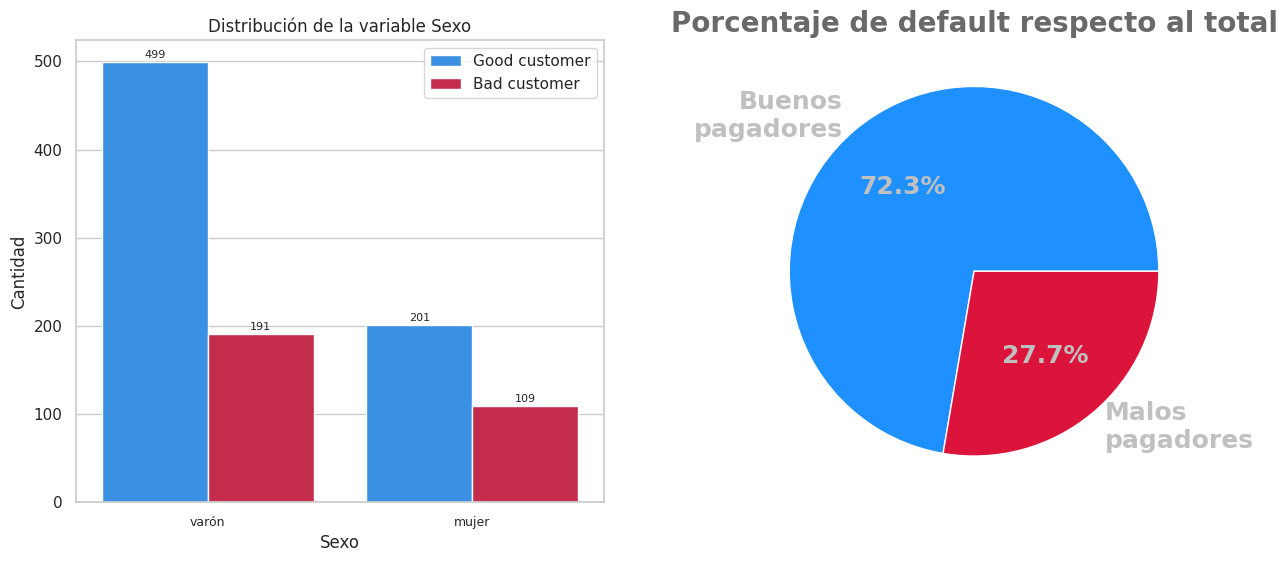

In [22]:
def graf_bar_count_total(x):
    # EXTRAER TEXTO DEL DIC PARA ETIQUETAS
    categories = x
    categorie = df_dic[df_dic['name'] == categories]['categories'].iloc[0]
    categorie_default = df_dic[df_dic['name'] == 'Incumplimiento']['categories'].iloc[0]
    a = []
    for i in categorie:
        a.append(i)
    a = pd.DataFrame(a, columns=[categories])

    # DEFINIR GRÁFICO DE BARRAS
    custom_palette = sns.color_palette(['dodgerblue', 'crimson'])
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 6))
    ax1 = plt.subplot(1, 2, 1)  # Subplot para el gráfico de barras
    ax2 = plt.subplot(1, 2, 2)  # Subplot para el gráfico de pastel

    # Gráfico de barras
    ax1 = sns.countplot(x=x, hue='Incumplimiento', data=df_bank, palette=custom_palette, dodge=True, ax=ax1)

    # Colocar valores al final de las barras
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

    ax1.set_xlabel(x)
    ax1.legend(categorie_default)
    ver = a[x].apply(lambda x: len(x) < 30)
    ver = ver.all()
    if len(a[x]) < 5 and ver:
        ax1.set_xticklabels(a[x], fontsize=9, rotation=0, ha='center')
    elif len(a[x]) < 5 and not ver:
        ax1.set_xticklabels(a[x], fontsize=9, rotation=45, ha='right')
    else:
        ax1.set_xticklabels(a[x], fontsize=9, rotation=45, ha='right')

    ax1.set_ylabel('Cantidad')
    ax1.set_title(f'Distribución de la variable {x}')

    # Gráfico de pastel
    counts = df_bank.groupby([x, 'Incumplimiento']).size().unstack()
    counts['Total'] = counts.sum(axis=1)
    counts['Porcentaje_Mujeres'] = counts[0] / counts['Total'] * 100
    counts['Porcentaje_Varones'] = counts[1] / counts['Total'] * 100

    ax2.pie(counts.loc[0, ['Porcentaje_Mujeres', 'Porcentaje_Varones']], labels=['Buenos\npagadores', 'Malos\npagadores'],
            autopct='%1.1f%%', colors=['dodgerblue', 'crimson'],textprops={'fontsize': 18, 'color': 'silver','fontweight':'bold'})
    ax2.set_title('Porcentaje de default respecto al total',fontsize=20,color='dimgray',fontweight= 'bold')

    plt.show()

graf_bar_count_total('Sexo')


In [23]:
categorie = df_dic[df_dic['name'] == 'Trabajo' ]['categories'].iloc[0]
categorie_default = df_dic[df_dic['name'] == 'Incumplimiento' ]['categories'].iloc[0]
a=[]
for i in categorie:
  a.append(i)
a = pd.DataFrame(a, columns=['Trabajo'])


# Aplicar la traducción a la columna a[x]
a['Trabajo'] = a['Trabajo'].map(traducir)
a

,Trabajo
0,desempleados/ no cualificados - no residentes
1,no cualificado - residente
2,empleado / funcionario cualificado
3,directivo/ autónomo/empleado/ directivo altamente cualificado


In [24]:
df_dic

,name,categories
0,Incumplimiento,"{'Good customer': '0', 'Bad customer': '1'}"
1,Estado_cuenta,"{'< 0 DM': '1', '0 <= ... < 200 DM': '2', '>= 200 DM / salary assignments for at least 1 year': '3', 'no checking account': '4'}"
2,Rango_plazos_credito,"{'1 <= ... < 12': '1', '12 <= ... < 24': '2', '24 <= ... < 36': '3', '36 <= ... < 48': '4', '48 <= ... < 60': '5', '60 <= ... < 72': '6'}"
3,Proposito,"{'car (new)': '1', 'car (used)': '2', 'furniture/equipment': '3', 'radio/television': '4', 'domestic appliances': '5', 'repairs': '6', 'education': '7', '(vacation - does not exist?)': '8', 'retraining': '9', 'business': '10', 'others': '11'}"
4,Rango_valor_credito,"{'1 <= ... < 1000': '1', '1000 <= ... < 2000': '2', '2000 <= ... < 3000': '3', '3000 <= ... < 4000': '4', '4000 <= ... < 5000': '5', '5000 <= ... < 6000': '6', '6000 <= ... < 7000': '7', '7000 <= ... < 8000': '8', '8000 <= ... < 9000': '9', '9000 <= ... < 10000': '10', '10000 <= ... < 11000': '11', '11000 <= ... < 12000': '12', '12000 <= ... < 13000': '13', '13000 <= ... < 14000': '14', '14000 <= ... < 15000': '15', '15000 <= ... < 16000': '16', '16000 <= ... < 17000': '17', '17000 <= ... < 18000': '18', '18000 <= ... < 19000': '19', '19000 <= ... < 20000': '20'}"
5,Ahorros,"{'... < 100 DM': '5', '100 <= ... < 500 DM': '4', '500 <= ... < 1000 DM ': '3', '.. >= 1000 DM ': '2', 'unknown/ no savings account': '1'}"
6,Empleo_actual,"{'unemployed': '5', '... < 1 year ': '4', '1 <= ... < 4 years': '3', '4 <= ... < 7 years': '2', '.. >= 7 years': '1'}"
7,Estado_personal_sexo,"{'male : single': '3', 'female : divorced/separated/married': '2', 'male : divorced/separated': '1', 'male : married/widowed': '4', 'female : single': '5'}"
8,Otros_deudores,"{'none': '1', 'co-applicant': '2', 'guarantor': '3'}"
9,Propiedad,"{'real estate': '1', 'if not A121 : building society savings agreement/ life insurance': '2', 'if not A121/A122 : car or other, not in attribute 6': '3', 'unknown / no property': '4'}"


In [25]:
def graf_bar_count(x):
    # EXTREAE TEXTO DEL DIC PARA ETIQUETAS
    categories=x
    categorie = df_dic[df_dic['name'] == categories ]['categories'].iloc[0]
    categorie_default = df_dic[df_dic['name'] == 'Incumplimiento' ]['categories'].iloc[0]

    b=[]
    for i in categorie_default:
      b.append(i)
      # b.append(traducir(i))

    a=[]
    for i in categorie:
      a.append(i)
    a = pd.DataFrame(a, columns=[categories])
    a[x] = a[x].map(traducir)

    #DEFINIR GRAF
    custom_palette = sns.color_palette(['dodgerblue', 'crimson'])
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=x, hue='Incumplimiento', data=df_bank, palette=custom_palette, dodge=True)

    # Colocar valores al final de las barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points',fontsize=10)

    plt.xlabel(x)
    plt.legend(b)
    ver=a[x].apply(lambda x: len(x) < 30)
    ver=ver.all()
    if len(a[x]) < 5 and ver:
        plt.xticks(range(len(a[x])), a[x], fontsize=9, rotation=0, ha='center')
    elif len(a[x]) < 5 and not ver:
        plt.xticks(range(len(a[x])), a[x], fontsize=9, rotation=45, ha='right')
    else:
        plt.xticks(range(len(a[x])), a[x], fontsize=9, rotation=45, ha='right')

    legend_x = 0.26  # Ajusta la coordenada x de la leyenda
    legend_y = 0.86 # Ajusta la coordenada y de la leyenda
    # ax.legend(b,title='', loc='center left', bbox_to_anchor=(legend_x, legend_y), frameon=False, fontsize=12, ncol=len(df_bank.columns))


    plt.ylabel('')
    plt.yticks([])
    plt.title(f'Distribución de la variable {x} vs default',fontsize=16)

    a=pd.DataFrame(a)
    plt.box(False)
    ax.yaxis.tick_left()
    ax.xaxis.tick_bottom()
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=0)
    plt.show()
    # print(a)
# graf_bar_count('Cuota_como_porcentaje_ingreso')
# graf_bar_count('sexo')

In [26]:
# counts = df_bank.groupby(['sexo', 'default']).size().unstack()
counts = df_bank.groupby(['Sexo', 'Incumplimiento']).size()
df_counts=pd.DataFrame(counts)
df_counts.rename(columns={0: 'count'}, inplace=True)
# df_counts['default']=df_counts.index[:-1]
# df_counts['sexo']=df_counts.index[0]
df_counts

count
Sexo Incumplimiento       
0    0                 499
     1                 191
1    0                 201
     1                 109

In [27]:
df_bank.columns

Index(['Incumplimiento', 'Estado_cuenta', 'Historial_credito', 'Proposito',
       'Ahorros', 'Empleo_actual', 'Cuota_como_porcentaje_ingreso',
       'Otros_deudores', 'Residencia_actual_desde', 'Propiedad',
       'Otros_planes_cuotas', 'Vivienda', 'Creditos_en_banco', 'Trabajo',
       'Personas_a_cargo', 'Telefono', 'Trabajador_extranjero', 'Rango_edad',
       'Rango_valor_credito', 'Rango_plazos_credito', 'Sexo', 'Estado_civil'],
      dtype='object')

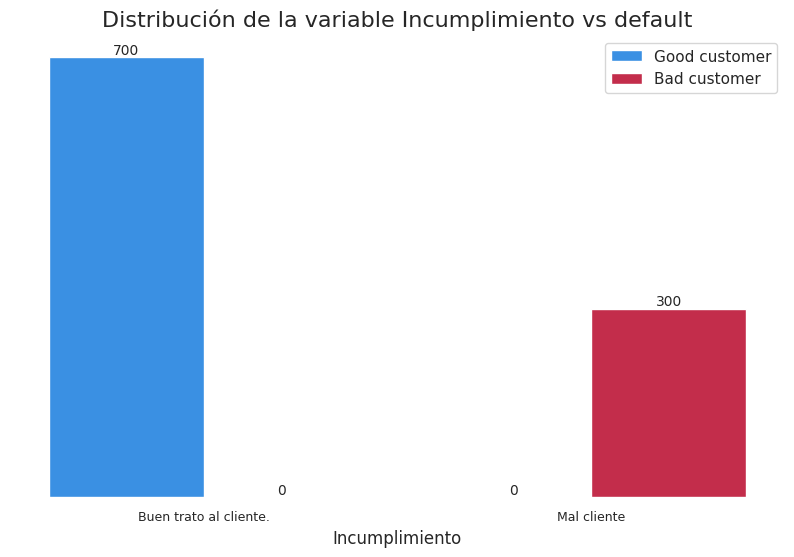

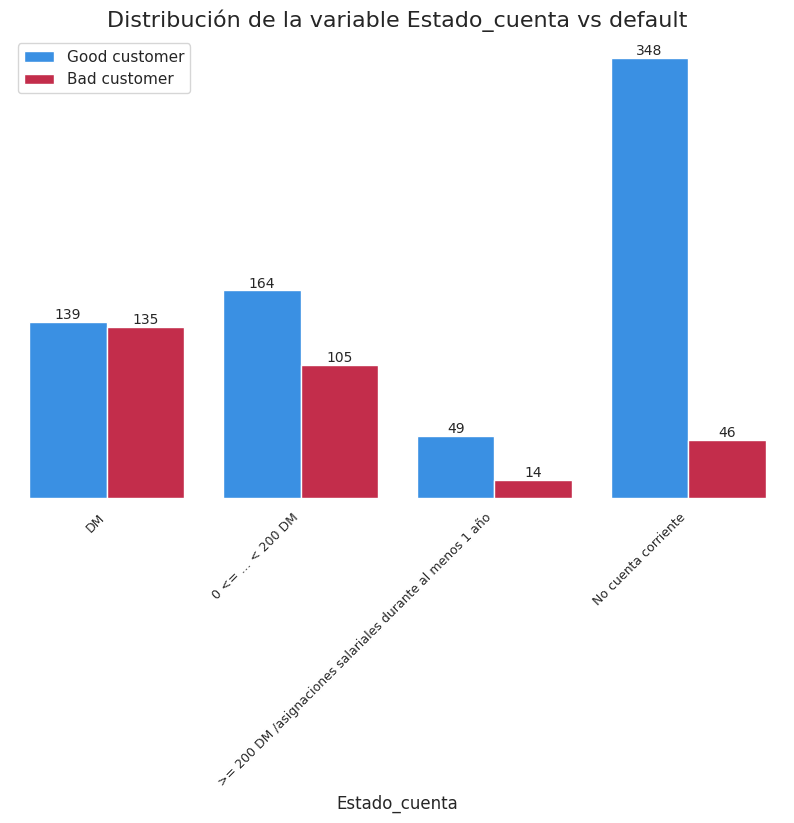

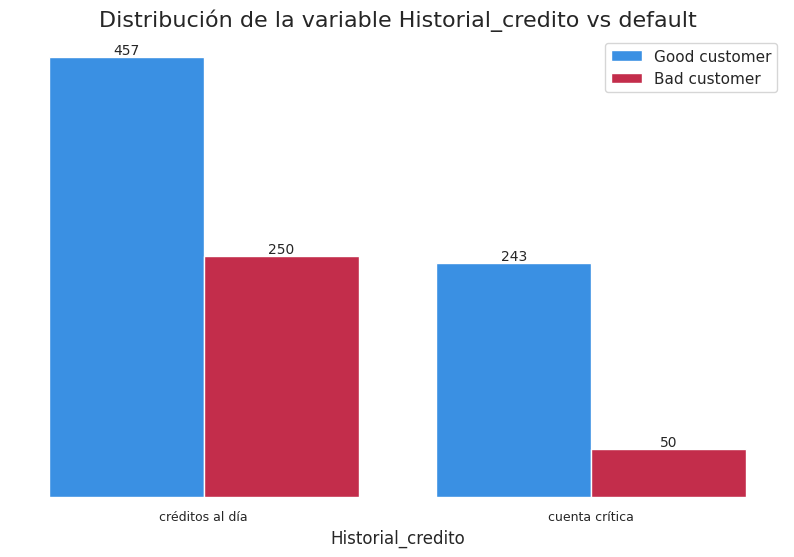

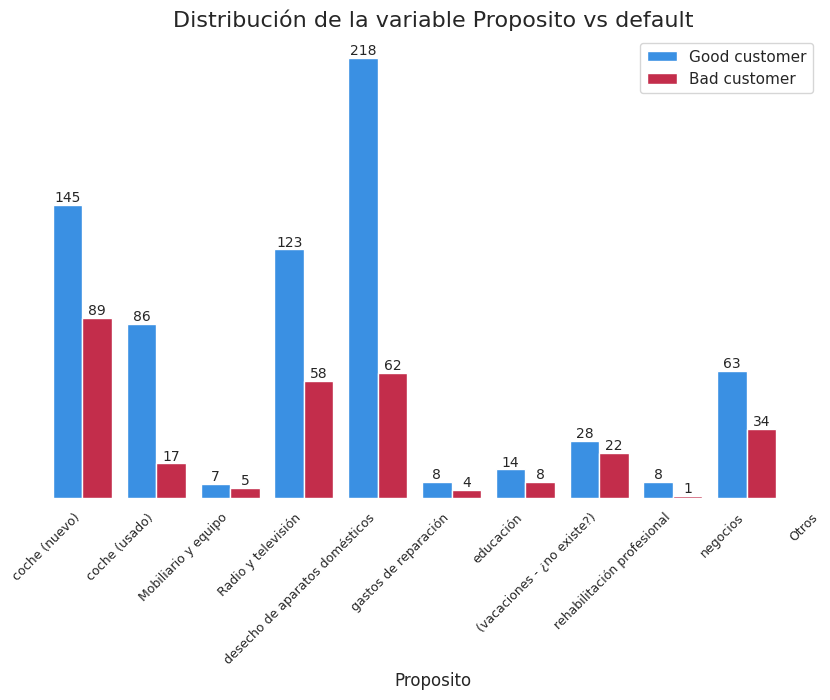

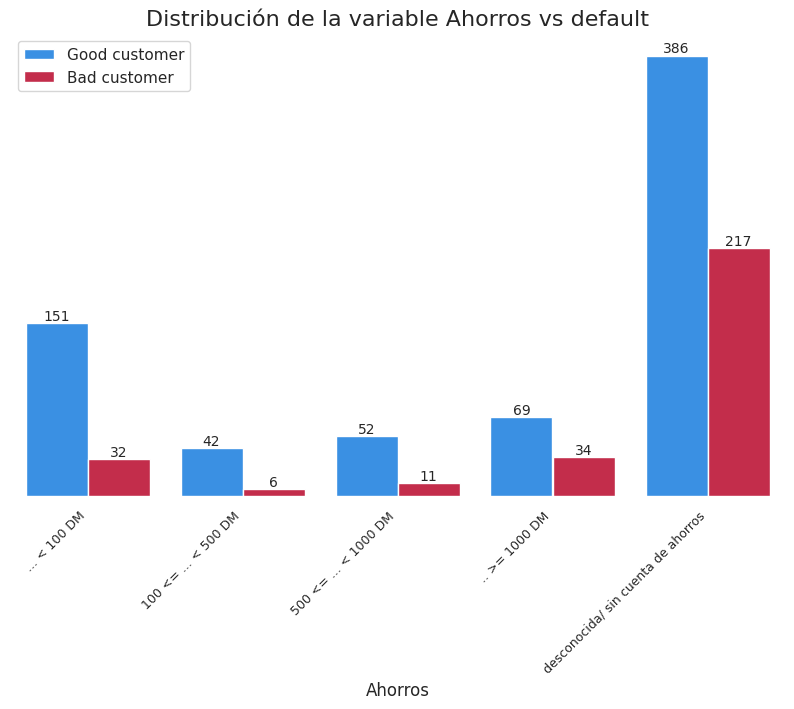

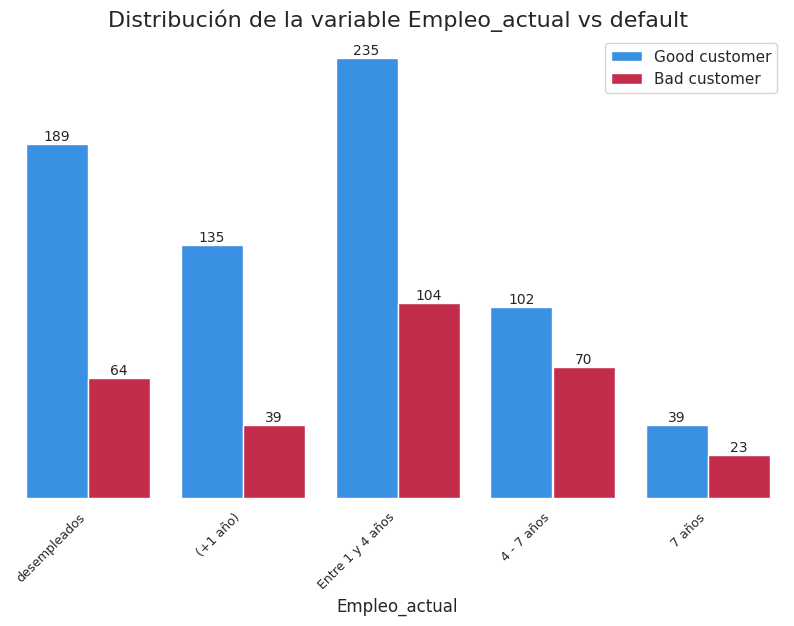

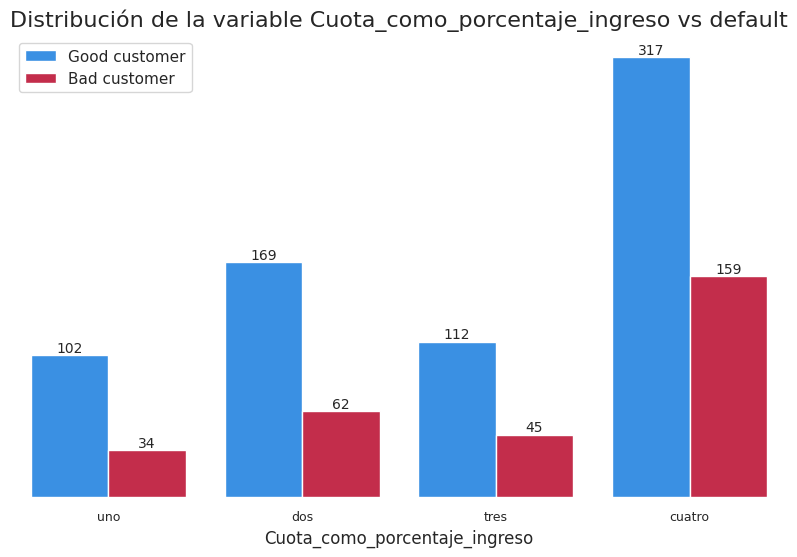

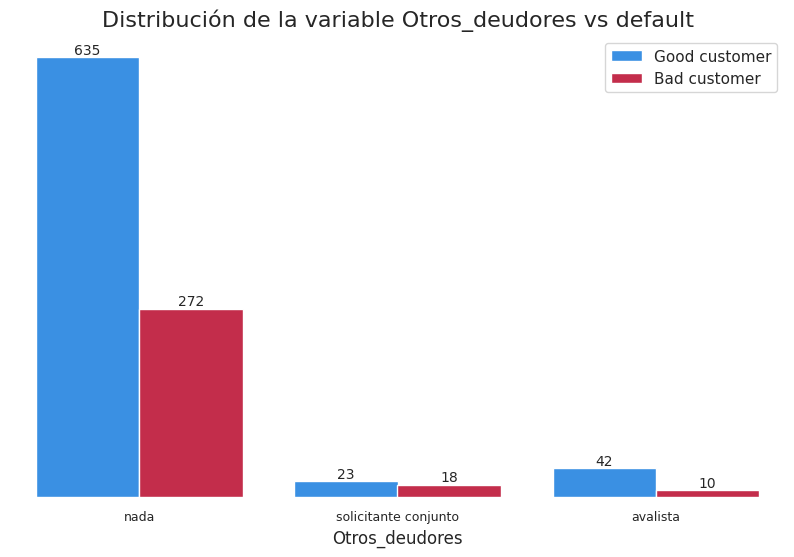

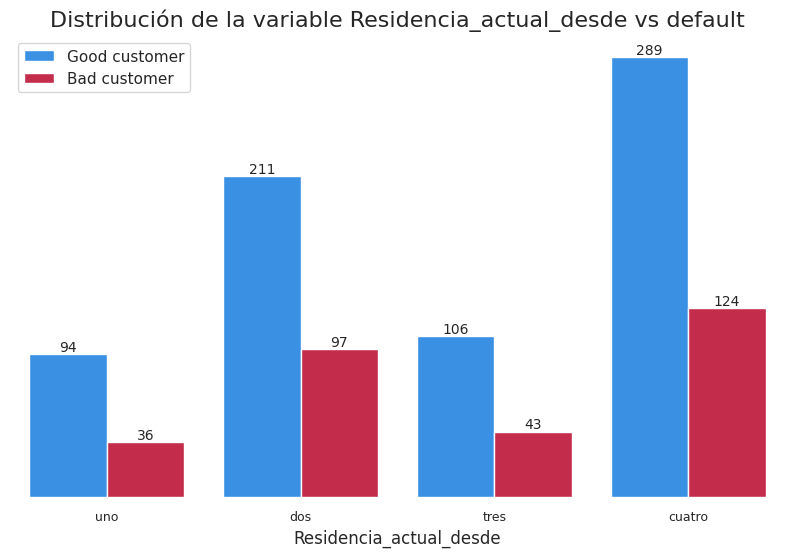

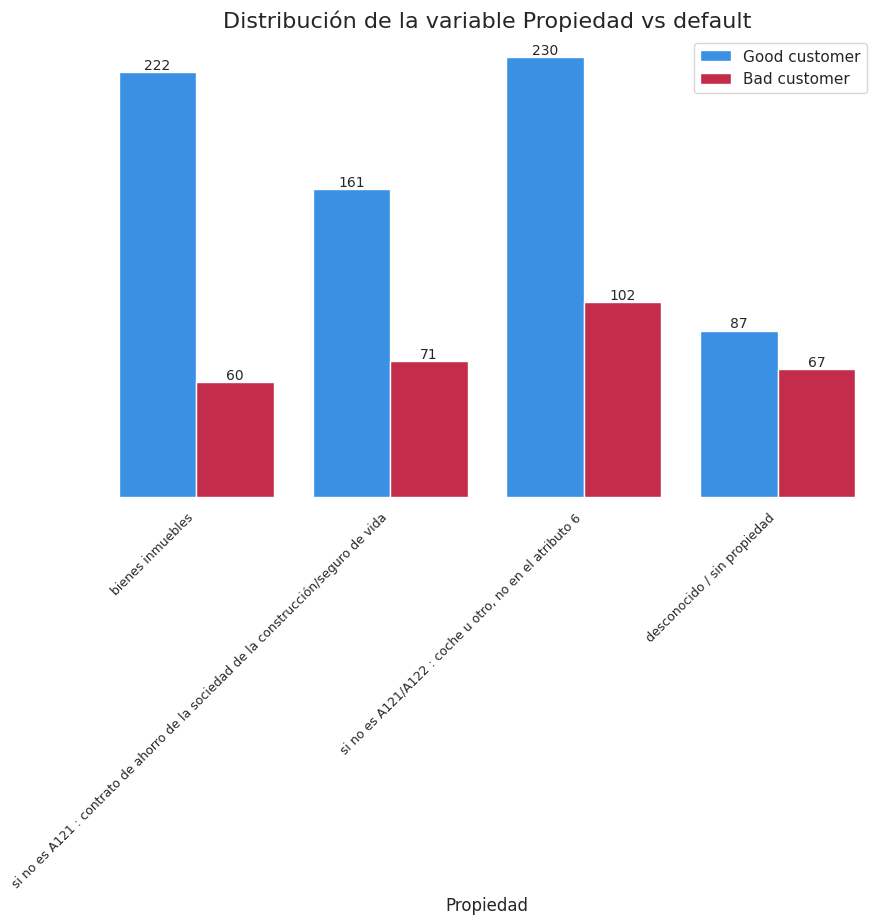

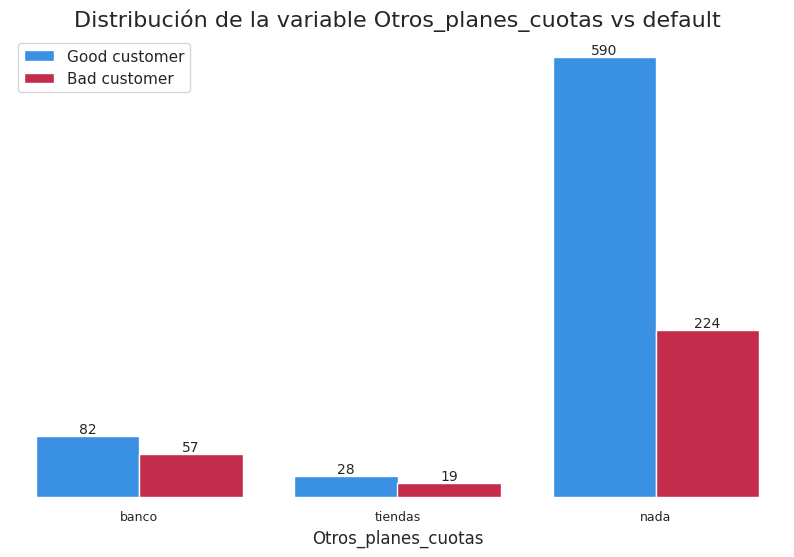

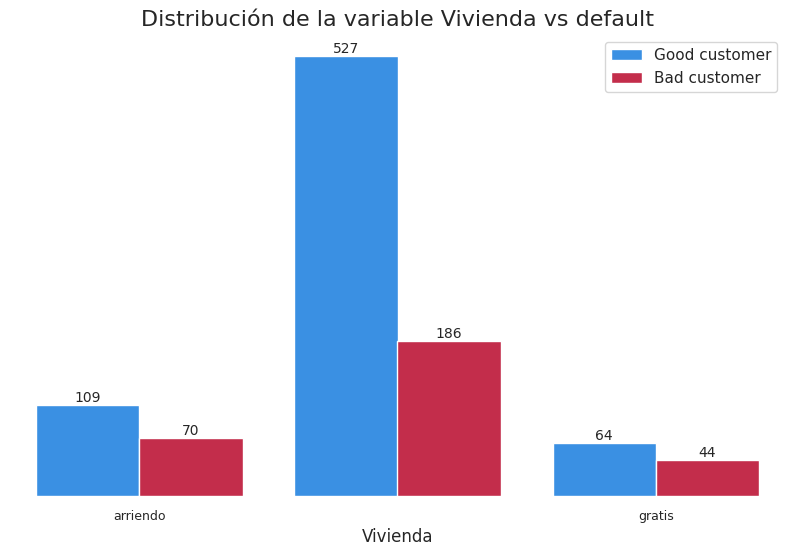

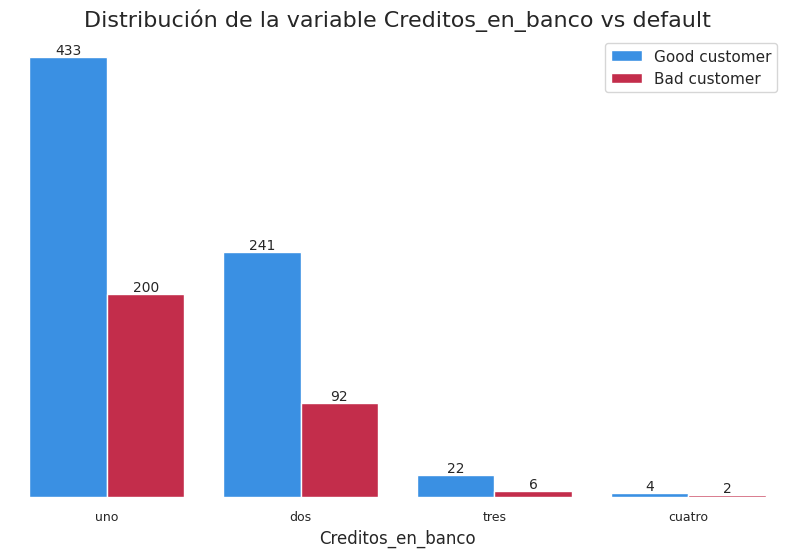

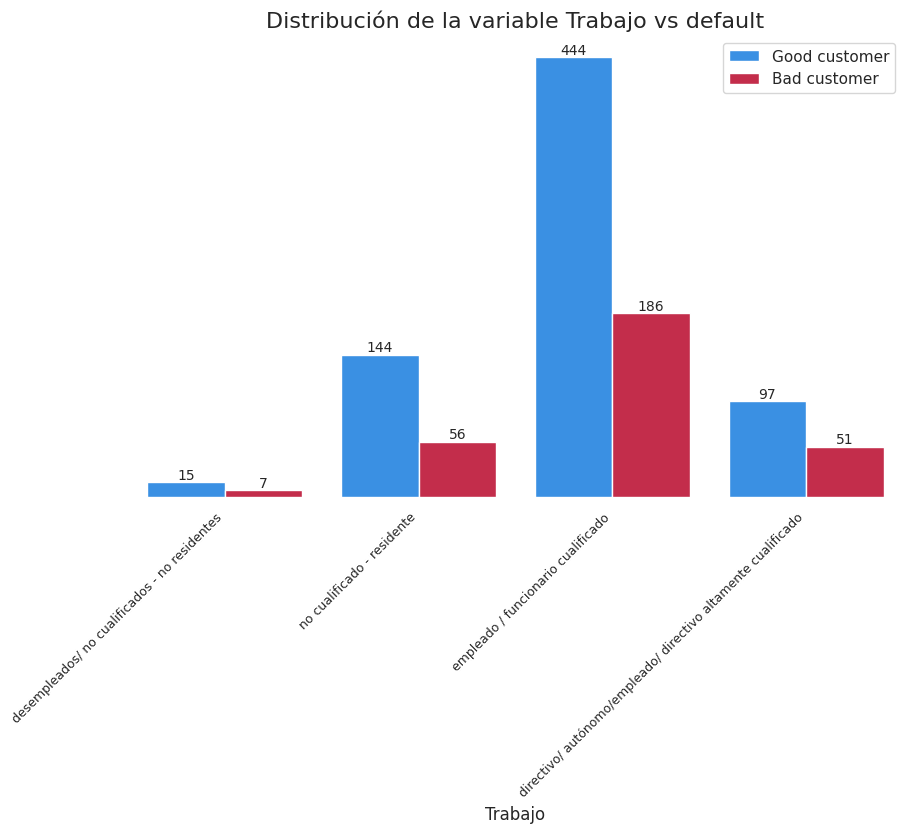

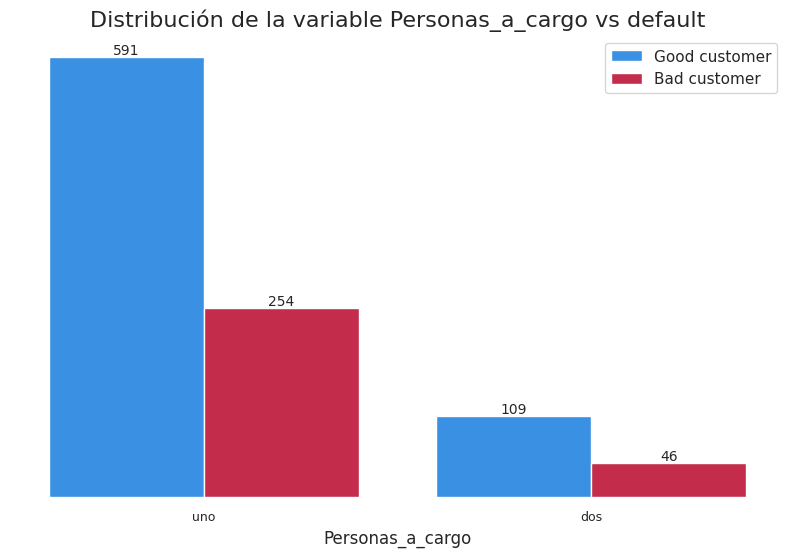

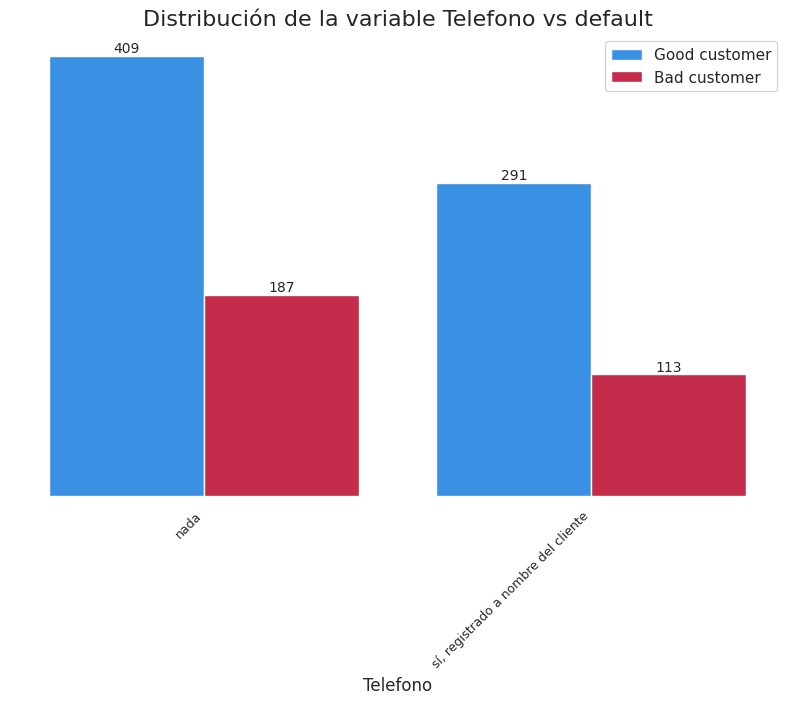

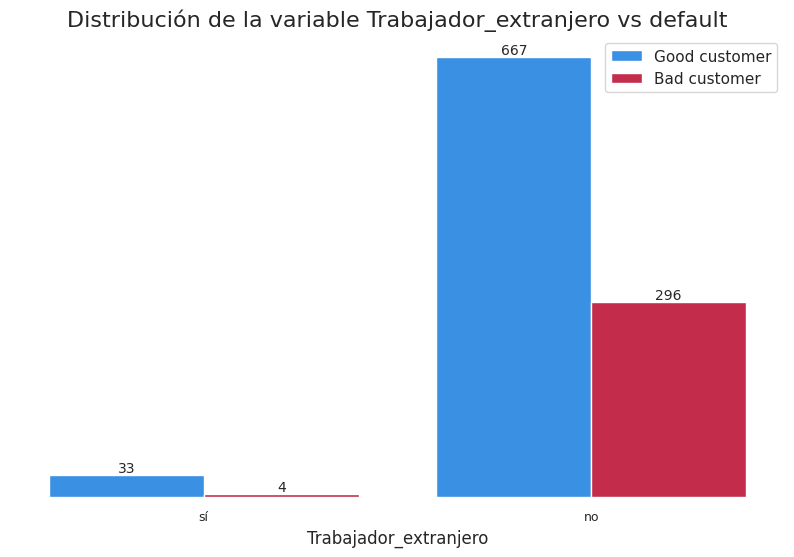

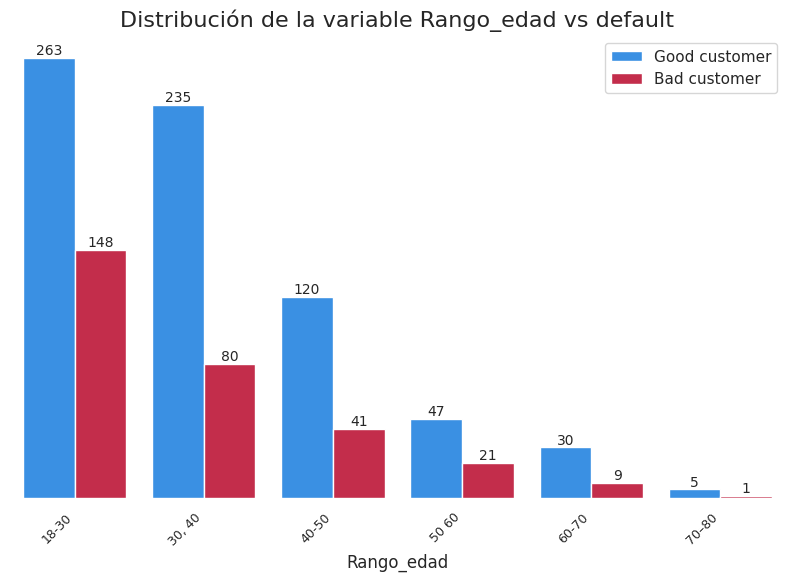

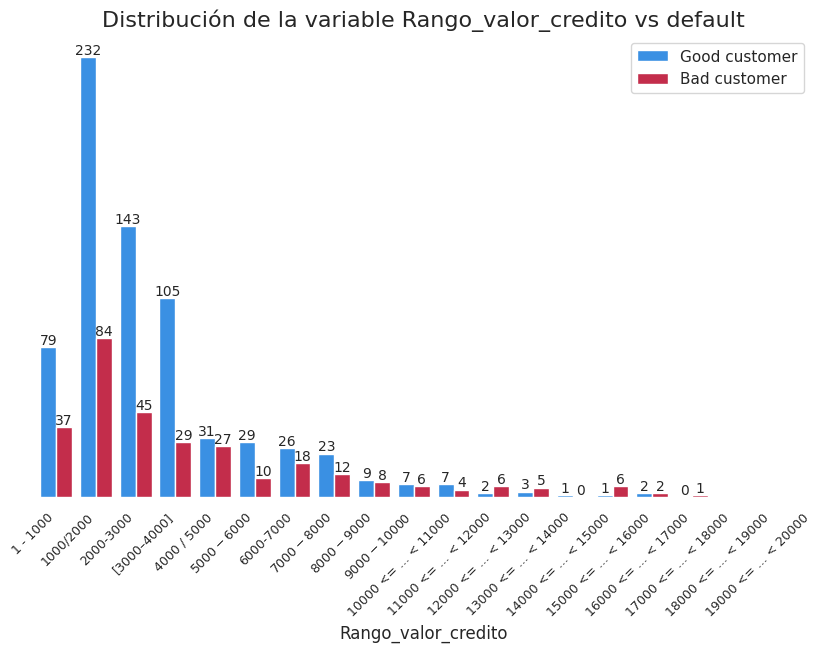

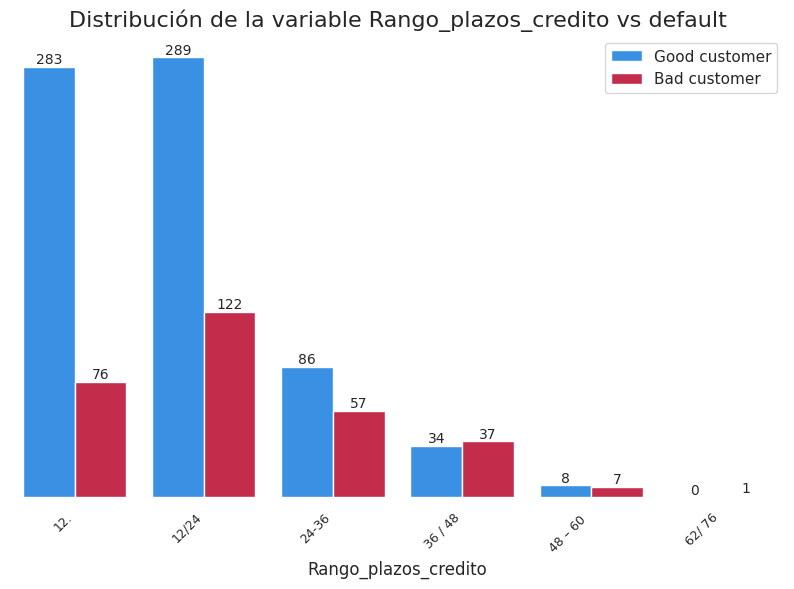

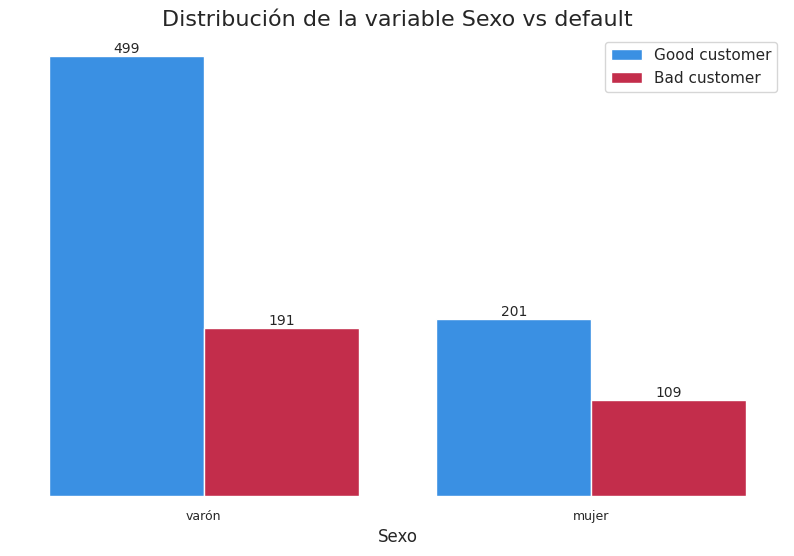

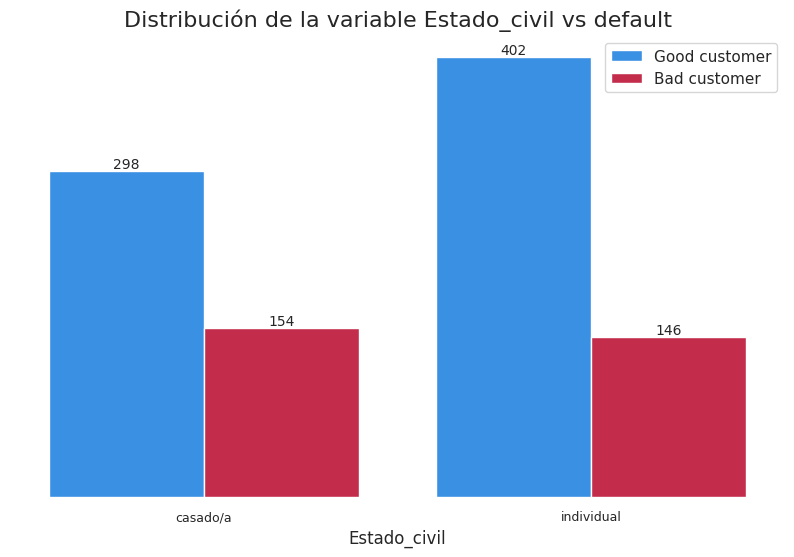

In [28]:
for i in df_bank.columns:
  graf_bar_count(i)


In [29]:
# 'sexo','estado_civil','rango_plazos_credito','rango_edad','default'
# graf_bar_count('Sexo')
# graf_bar_count('Estado_civil')
# graf_bar_count('Rango_edad')
# graf_bar_count('Rango_plazos_credito')
# graf_bar_count('Rango_valor_credito')
# graf_bar_count('Creditos_en_banco')
# graf_bar_count('Proposito')

#**3. Exploración de Datos**


---


In [30]:
correlacion=df_bank.corr()
correlacion_mayor_al=correlacion[correlacion>.2]
correlacion_mayor_al

,Incumplimiento,Estado_cuenta,Historial_credito,Proposito,Ahorros,Empleo_actual,Cuota_como_porcentaje_ingreso,Otros_deudores,Residencia_actual_desde,Propiedad,Otros_planes_cuotas,Vivienda,Creditos_en_banco,Trabajo,Personas_a_cargo,Telefono,Trabajador_extranjero,Rango_edad,Rango_valor_credito,Rango_plazos_credito,Sexo,Estado_civil
Incumplimiento,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estado_cuenta,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Historial_credito,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.501364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Proposito,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ahorros,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Empleo_actual,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cuota_como_porcentaje_ingreso,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Otros_deudores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residencia_actual_desde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.262699,NaN,NaN,NaN,NaN
Propiedad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.345219,NaN,0.276149,NaN,NaN,NaN,NaN,0.305677,0.290379,NaN,NaN


In [31]:
correlacion_mayor_target=abs(correlacion['Incumplimiento'])
df_corr_all=correlacion_mayor_target.sort_values(ascending=False)
df_corr_all=pd.DataFrame(df_corr_all)
df_corr_all
# plt.barh(df_corr_all, df_corr_all['Incumplimineto'], align="center")
# plt.show()

,Incumplimiento
Incumplimiento,1.000000
Estado_cuenta,0.350847
Rango_plazos_credito,0.197321
Historial_credito,0.181713
Ahorros,0.178943
Rango_valor_credito,0.152609
Propiedad,0.142612
Empleo_actual,0.116002
Otros_planes_cuotas,0.109844
Trabajador_extranjero,0.082079


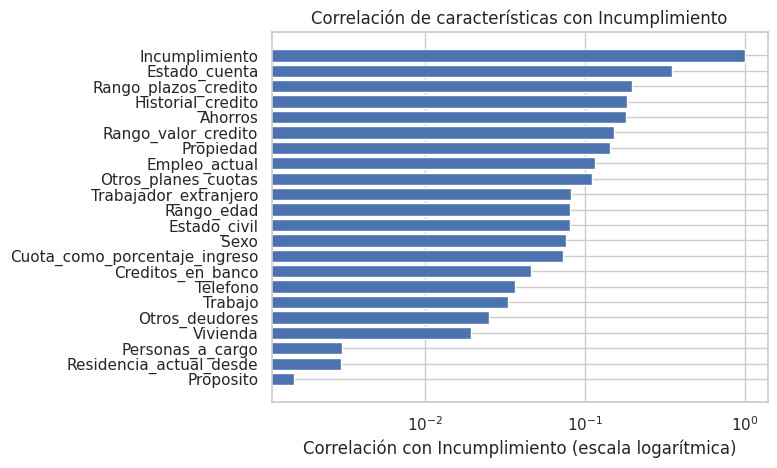

In [32]:
correlacion_mayor_target = abs(correlacion['Incumplimiento'])
df_corr_all = correlacion_mayor_target.sort_values(ascending=False)
df_corr_all = pd.DataFrame(df_corr_all)
df_corr_all.reset_index(inplace=True)
df_corr_all.columns = ['Feature', 'Correlation']

plt.barh(df_corr_all['Feature'], df_corr_all['Correlation'], align="center")
plt.xscale('log')  # Configura la escala logarítmica en el eje x
plt.xlabel('Correlación con Incumplimiento (escala logarítmica)')
plt.title('Correlación de características con Incumplimiento')
plt.gca().invert_yaxis()  # Invierte el eje y para mostrar de mayor a menor
plt.show()


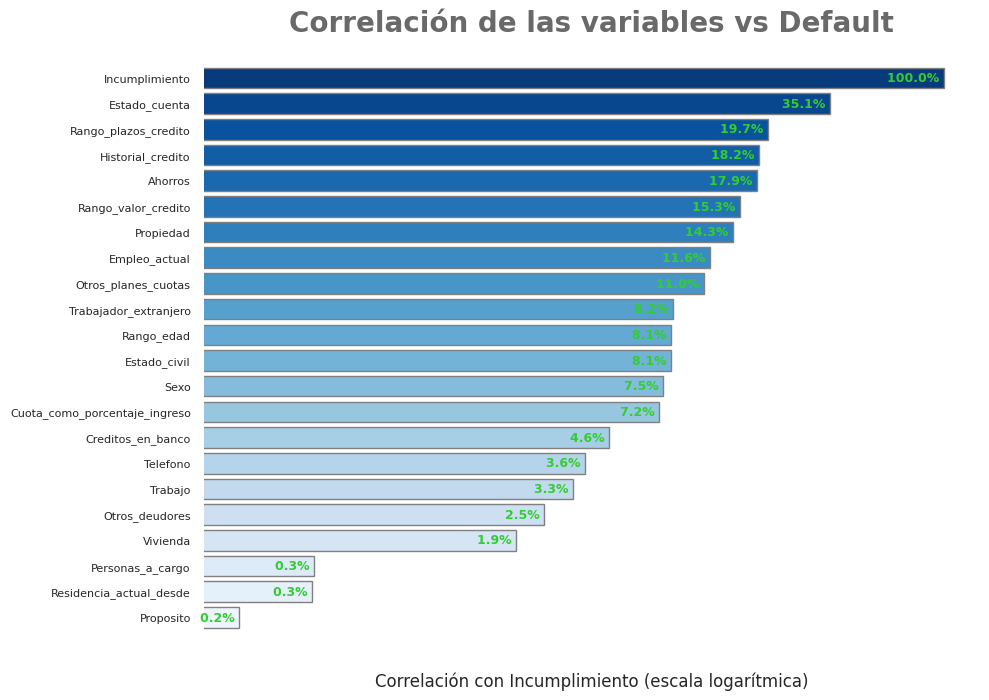

In [33]:
import seaborn as sns

correlacion_mayor_target = abs(correlacion['Incumplimiento'])
df_corr_all = correlacion_mayor_target.sort_values(ascending=False)
df_corr_all = pd.DataFrame(df_corr_all)
df_corr_all.reset_index(inplace=True)
df_corr_all.columns = ['Feature', 'Correlation']

# Ajusta el tamaño de la gráfica y utiliza la paleta 'inferno'
plt.figure(figsize=(10, 8))
colors = sns.color_palette('Blues_r', len(df_corr_all['Correlation']))

# Crea la gráfica de barras horizontales
bars = plt.barh(df_corr_all['Feature'], df_corr_all['Correlation'], color=colors, edgecolor='gray')
plt.xscale('log')  # Configura la escala logarítmica en el eje x
plt.xlabel('Correlación con Incumplimiento (escala logarítmica)',)
plt.title('Correlación de las variables vs Default', fontsize=20,fontweight='bold',color='dimgray')
plt.gca().invert_yaxis()  # Invierte el eje y para mostrar de mayor a menor

# Agrega etiquetas con porcentajes al final de las barras
for bar, value in zip(bars, df_corr_all['Correlation']):
    plt.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.1%} ',ha='right', va='center', color='limegreen', fontsize=9,fontweight='bold')

plt.xticks([])
plt.yticks(fontsize=8)
plt.box(False)
plt.grid(False)
plt.show()


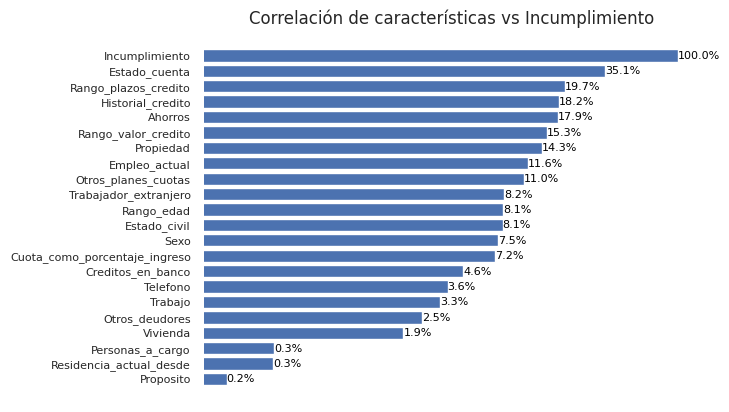

In [34]:
correlacion_mayor_target = abs(correlacion['Incumplimiento'])
df_corr_all = correlacion_mayor_target.sort_values(ascending=False)
df_corr_all = pd.DataFrame(df_corr_all)
df_corr_all.reset_index(inplace=True)
df_corr_all.columns = ['Feature', 'Correlation']

plt.barh(df_corr_all['Feature'], df_corr_all['Correlation'], align="center")
plt.xscale('log')  # Configura la escala logarítmica en el eje x
plt.xlabel('')
# plt.xlabel('Correlación con Incumplimiento (escala logarítmica)')
plt.title('Correlación de características vs Incumplimiento')
plt.gca().invert_yaxis()  # Invierte el eje y para mostrar de mayor a menor

# Agrega etiquetas con porcentajes al final de las barras
for index, value in enumerate(df_corr_all['Correlation']):
    plt.text(value, index, f'{value:.1%}', va='center',color='black', fontsize=8)
plt.xticks([])
plt.yticks(fontsize=8)
plt.box(False)
plt.grid(False)
plt.show()


##para que sea explicativa una var tiene que se mayor al 7% y menor al 50%

In [35]:
correlacion_mayor_target_7=correlacion_mayor_target[correlacion_mayor_target>.07]
correlacion_mayor_target_7

Incumplimiento                   1.000000
Estado_cuenta                    0.350847
Historial_credito                0.181713
Ahorros                          0.178943
Empleo_actual                    0.116002
Cuota_como_porcentaje_ingreso    0.072404
Propiedad                        0.142612
Otros_planes_cuotas              0.109844
Trabajador_extranjero            0.082079
Rango_edad                       0.080878
Rango_valor_credito              0.152609
Rango_plazos_credito             0.197321
Sexo                             0.075493
Estado_civil                     0.080677
Name: Incumplimiento, dtype: float64

In [36]:
df_bank.corr().round(2)

,Incumplimiento,Estado_cuenta,Historial_credito,Proposito,Ahorros,Empleo_actual,Cuota_como_porcentaje_ingreso,Otros_deudores,Residencia_actual_desde,Propiedad,Otros_planes_cuotas,Vivienda,Creditos_en_banco,Trabajo,Personas_a_cargo,Telefono,Trabajador_extranjero,Rango_edad,Rango_valor_credito,Rango_plazos_credito,Sexo,Estado_civil
Incumplimiento,1.00,-0.35,-0.18,0.00,0.18,0.12,0.07,-0.03,0.00,0.14,-0.11,-0.02,-0.05,0.03,-0.00,-0.04,0.08,-0.08,0.15,0.20,0.08,-0.08
Estado_cuenta,-0.35,1.00,0.15,0.05,-0.22,-0.11,-0.01,-0.13,-0.04,-0.03,0.05,0.02,0.08,0.04,-0.01,0.07,0.03,0.07,-0.04,-0.07,-0.03,0.05
Historial_credito,-0.18,0.15,1.00,-0.08,-0.02,-0.15,0.04,-0.03,0.09,-0.03,0.06,0.06,0.50,-0.01,0.02,0.04,-0.04,0.15,-0.04,-0.06,-0.06,0.09
Proposito,0.00,0.05,-0.08,1.00,0.02,-0.02,0.08,-0.03,-0.06,-0.03,-0.04,-0.02,0.03,-0.03,-0.06,0.02,0.12,-0.02,-0.03,0.11,-0.02,-0.03
Ahorros,0.18,-0.22,-0.02,0.02,1.00,0.12,-0.02,0.11,-0.09,-0.02,-0.00,-0.01,0.02,-0.01,-0.03,-0.09,0.01,-0.08,-0.06,-0.05,0.03,-0.06
Empleo_actual,0.12,-0.11,-0.15,-0.02,0.12,1.00,-0.13,0.01,-0.25,-0.09,0.04,-0.11,-0.13,-0.10,-0.10,-0.06,-0.03,-0.25,0.01,-0.04,0.20,-0.24
Cuota_como_porcentaje_ingreso,0.07,-0.01,0.04,0.08,-0.02,-0.13,1.00,-0.01,0.05,0.05,-0.00,0.09,0.02,0.10,-0.07,0.01,0.09,0.04,-0.27,0.04,-0.09,0.12
Otros_deudores,-0.03,-0.13,-0.03,-0.03,0.11,0.01,-0.01,1.00,-0.03,-0.16,-0.06,-0.07,-0.03,-0.06,0.02,-0.08,-0.12,-0.03,-0.03,-0.01,-0.01,0.01
Residencia_actual_desde,0.00,-0.04,0.09,-0.06,-0.09,-0.25,0.05,-0.03,1.00,0.15,0.00,0.01,0.09,0.01,0.04,0.10,0.05,0.26,0.03,0.03,0.01,0.06
Propiedad,0.14,-0.03,-0.03,-0.03,-0.02,-0.09,0.05,-0.16,0.15,1.00,-0.09,0.35,-0.01,0.28,0.01,0.20,0.13,0.06,0.31,0.29,-0.05,0.15


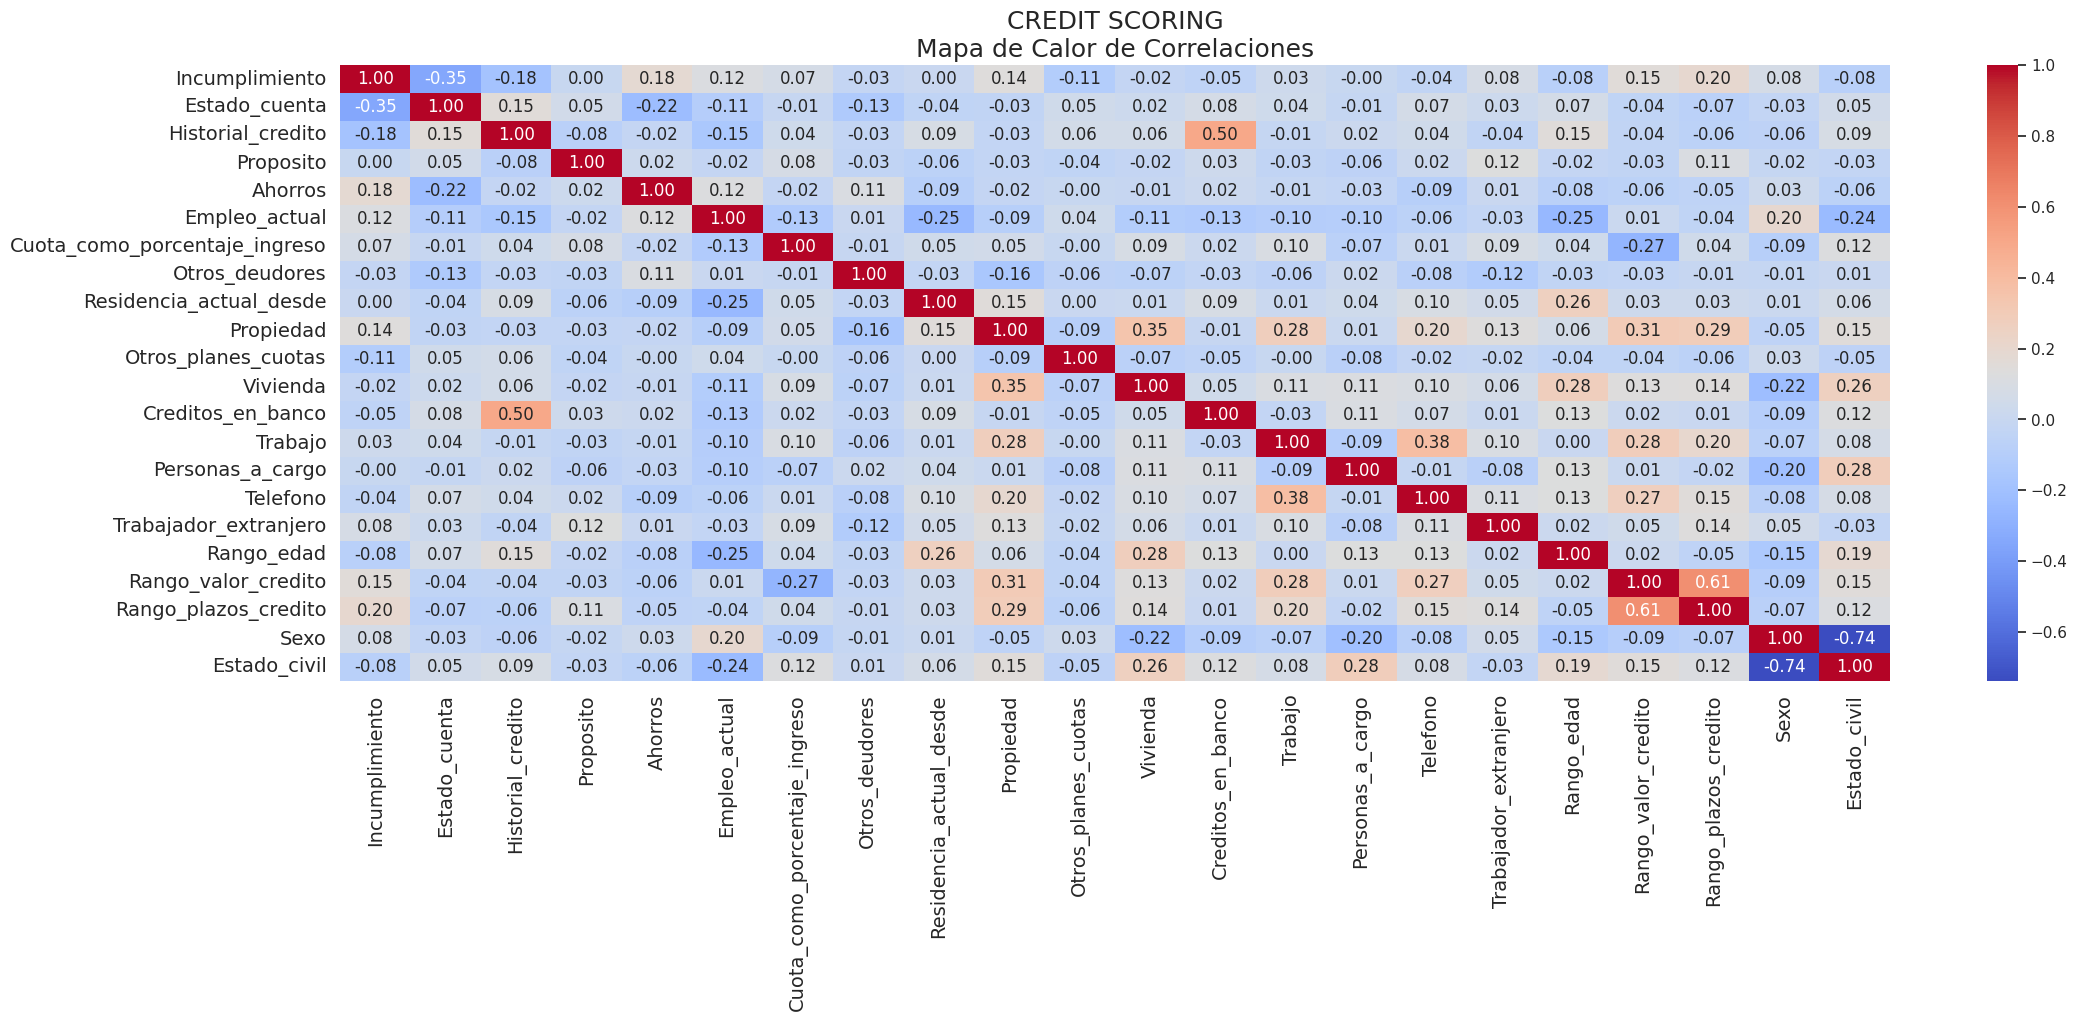

In [37]:
plt.figure(figsize=(25, 8))
heatmap = sns.heatmap(df_bank.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# heatmap = sns.heatmap(df_bank.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('CREDIT SCORING\nMapa de Calor de Correlaciones', fontsize=18)
plt.show()

##Elección de las variables significativas con DecisionTreeRegressor:

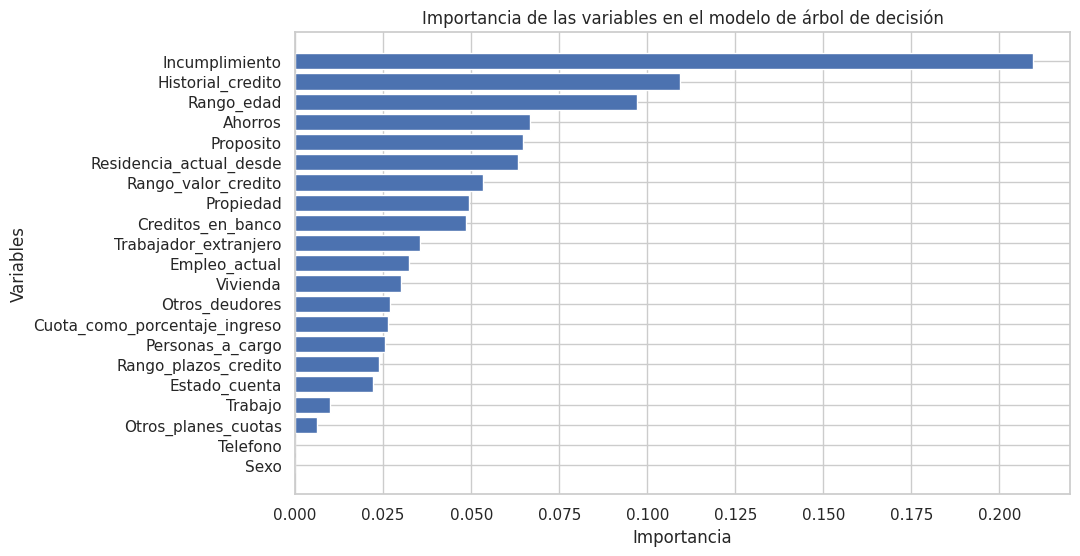

In [38]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_bank.drop('Incumplimiento', axis=1)
y = df_bank['Incumplimiento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Entrenar un modelo de árbol de decisión
depth = 7
tree = DecisionTreeClassifier(criterion='gini', max_depth=depth)
tree.fit(X_train, y_train)

# Obtener importancias de las variables
importances = tree.feature_importances_

# Obtener índices ordenados
ranking = np.argsort(importances)

# Crear gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), importances[ranking], align="center")
plt.yticks(range(X_train.shape[1]), df_bank.columns[ranking])
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables en el modelo de árbol de decisión')
plt.show()


Variables count: 21
Variables utils: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20]
Training: 1.0
Test: 0.7
feature_importances:  20
Index(['Trabajo', 'Sexo', 'Personas_a_cargo', 'Cuota_como_porcentaje_ingreso',
       'Estado_cuenta', 'Vivienda', 'Propiedad', 'Rango_plazos_credito',
       'Trabajador_extranjero', 'Empleo_actual', 'Otros_planes_cuotas',
       'Otros_deudores', 'Rango_valor_credito', 'Residencia_actual_desde',
       'Creditos_en_banco', 'Ahorros', 'Rango_edad', 'Proposito',
       'Historial_credito', 'Incumplimiento'],
      dtype='object')


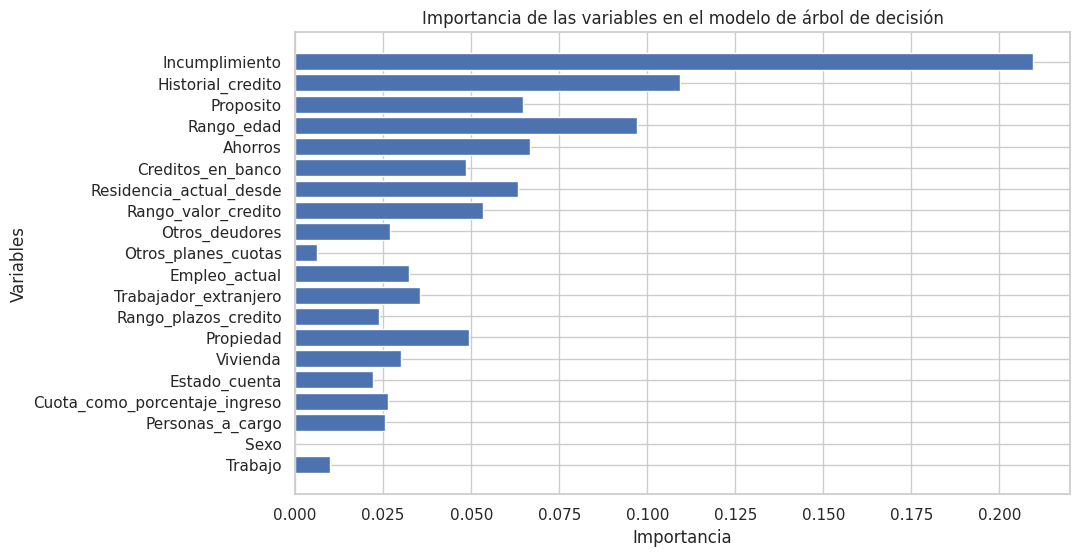

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_bank.drop('Incumplimiento', axis=1)
y = df_bank['Incumplimiento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

depth = 20
tree = DecisionTreeClassifier(criterion='gini', max_depth=depth)
tree.fit(X_train, y_train)

# Extraer los índices de las variables utilizadas en el modelo:
subset = np.unique(tree.tree_.feature[tree.tree_.feature >= 0])

print(f'Variables count: {X.shape[1]}')
print(f'Variables utils: {subset}')
print(f'Training: {tree.score(X_train, y_train).round(2)}')
print(f'Test: {tree.score(X_test, y_test).round(2)}')

# Obtener el ranking de características solo para las variables utilizadas
ranking = np.argsort(tree.feature_importances_)

# Filtrar solo las variables utilizadas
subset_ranking = [feature for feature in ranking if feature in subset]

print('feature_importances: ', len(df_bank.columns[subset_ranking]))
print(df_bank.columns[subset_ranking])

plt.figure(figsize=(10, 6))
# plt.barh(range(X_train.shape[1]), importances[ranking], align="center")
plt.barh(df_bank.columns[subset_ranking], importances[subset_ranking], align="center")
# plt.yticks(range(X_train.shape[1]), df_bank.columns[subset_ranking])
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables en el modelo de árbol de decisión')
plt.show()
# print('importances[ranking]:', importances[ranking])

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Inicializar el modelo de regresión logística
lg_model = LogisticRegression(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
lg_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = lg_model.predict(X_test)
y_logistic_pred = lg_model.predict(X_test)
# y_logistic_pred = lg_model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# Calcular AUC-ROC
roc_auc_logistic = roc_auc_score(y_test, y_logistic_pred)
print('Regresión Logística:')
print(f'AUC-ROC: {roc_auc_logistic:.4f}')

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir métricas de rendimiento
# print(f'accur: {accur:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Regresión Logística:
AUC-ROC: 0.7385
Accuracy: 0.8050

Confusion Matrix:
[[127  14]
 [ 25  34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       141
           1       0.71      0.58      0.64        59

    accuracy                           0.81       200
   macro avg       0.77      0.74      0.75       200
weighted avg       0.80      0.81      0.80       200



In [41]:
from sklearn.tree import DecisionTreeClassifier

# Inicializar el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
# y_tree_pred = tree_model.predict(X_test)

y_tree_pred = tree_model.predict(X_test)  # Probabilidad de la clase positiva
# y_tree_pred = tree_model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# Calcular AUC-ROC
roc_auc_logistic = roc_auc_score(y_test, y_tree_pred)
print(f'AUC-ROC (DecisionTreeClassifier): {roc_auc_logistic:.4f}')

# Evaluar el rendimiento del modelo de Árbol de Decisión
tree_accuracy = accuracy_score(y_test, y_tree_pred)
tree_conf_matrix = confusion_matrix(y_test, y_tree_pred)
tree_classification_rep = classification_report(y_test, y_tree_pred)

# Imprimir métricas de rendimiento del Árbol de Decisión
print(f'Accuracy (Decision Tree): {tree_accuracy:.4f}')
print('\nConfusion Matrix (Decision Tree):')
print(tree_conf_matrix)
print('\nClassification Report (Decision Tree):')
print(tree_classification_rep)


AUC-ROC (DecisionTreeClassifier): 0.6465
Accuracy (Decision Tree): 0.7100

Confusion Matrix (Decision Tree):
[[113  28]
 [ 30  29]]

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       141
           1       0.51      0.49      0.50        59

    accuracy                           0.71       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.71      0.71      0.71       200



In [42]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_forest_pred = rf_model.predict(X_test)

# Calcular AUC-ROC
roc_auc_logistic = roc_auc_score(y_test, y_forest_pred)
print(f'AUC-ROC (RandomForestClassifier): {roc_auc_logistic:.4f}')

# Evaluar el rendimiento del modelo de Random Forest
rf_accuracy = accuracy_score(y_test, y_forest_pred)
rf_conf_matrix = confusion_matrix(y_test, y_forest_pred)
rf_classification_rep = classification_report(y_test, y_forest_pred)

# Imprimir métricas de rendimiento del Random Forest
print(f'Accuracy (Random Forest): {rf_accuracy:.4f}')
print('\nConfusion Matrix (Random Forest):')
print(rf_conf_matrix)
print('\nClassification Report (Random Forest):')
print(rf_classification_rep)


AUC-ROC (RandomForestClassifier): 0.7223
Accuracy (Random Forest): 0.8100

Confusion Matrix (Random Forest):
[[132   9]
 [ 29  30]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       141
           1       0.77      0.51      0.61        59

    accuracy                           0.81       200
   macro avg       0.79      0.72      0.74       200
weighted avg       0.80      0.81      0.80       200



In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Inicializar el modelo de Naive Bayes (GaussianNB)
nb_model = GaussianNB()

# Entrenar el modelo con el conjunto de entrenamiento
nb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_nb_pred = nb_model.predict(X_test)

# Calcular AUC-ROC
roc_auc_logistic = roc_auc_score(y_test, y_nb_pred)
print(f'AUC-ROC (GaussianNB): {roc_auc_logistic:.4f}')

# Evaluar el rendimiento del modelo de Naive Bayes
nb_accuracy = accuracy_score(y_test, y_nb_pred)
nb_conf_matrix = confusion_matrix(y_test, y_nb_pred)
nb_classification_rep = classification_report(y_test, y_nb_pred)

# Imprimir métricas de rendimiento del Naive Bayes
print(f'Accuracy (Naive Bayes): {nb_accuracy:.4f}')
print('\nConfusion Matrix (Naive Bayes):')
print(nb_conf_matrix)
print('\nClassification Report (Naive Bayes):')
print(nb_classification_rep)


AUC-ROC (GaussianNB): 0.6788
Accuracy (Naive Bayes): 0.7000

Confusion Matrix (Naive Bayes):
[[103  38]
 [ 22  37]]

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       141
           1       0.49      0.63      0.55        59

    accuracy                           0.70       200
   macro avg       0.66      0.68      0.66       200
weighted avg       0.73      0.70      0.71       200



In [44]:
# print(df_banco.groupby(['estado_civil', 'sexo']).size())

#**4. Construcción de Modelos**


---


#**5. Evaluación y Selección del Modelo**


---


#PROBANDO EL MEJOR MODELO

In [45]:
# Definir las variables predictoras (X) y la variable objetivo (y)
# df_test_01=df.copy()
# X = df_test_01.drop('default', axis=1)  # Excluir la columna 'default' como variable predictora
# y = df_test_01['default']

In [46]:
# from sklearn.model_selection import train_test_split

# Supongamos que 'X' es tu conjunto de características y 'y' es tu variable objetivo 'default'
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Inicializa los modelos
logistic_model = LogisticRegression(random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(random_state=42)
nb_model = GaussianNB()
svc_model = SVC(random_state=42)

# Entrenamiento de los modelos
logistic_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)


SVC(random_state=42)

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Suponiendo que X_train y y_train son tus datos de entrenamiento y objetivos respectivamente
# X_train, X_test, y_train, y_test = train_test_split(df_bank.drop('default', axis=1), df_bank['default'], test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Realizar la validación cruzada
cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Resultados de la validación cruzada:")
print(cv_scores)
print("Precisión promedio: {:.4f}".format(cv_scores.mean()))


Resultados de la validación cruzada:
[0.7625  0.70625 0.7375  0.8     0.73125]
Precisión promedio: 0.7475


In [49]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes']

accuracy_values = [accuracy_score(y_test, y_logistic_pred),
                   accuracy_score(y_test, y_tree_pred),
                   accuracy_score(y_test, y_forest_pred),
                   accuracy_score(y_test, y_nb_pred)]

precision_values = [precision_score(y_test, y_logistic_pred),
                    precision_score(y_test, y_tree_pred),
                    precision_score(y_test, y_forest_pred),
                    precision_score(y_test, y_nb_pred)]

recall_values = [recall_score(y_test, y_logistic_pred),
                 recall_score(y_test, y_tree_pred),
                 recall_score(y_test, y_forest_pred),
                 recall_score(y_test, y_nb_pred)]

f1_values = [f1_score(y_test, y_logistic_pred),
              f1_score(y_test, y_tree_pred),
              f1_score(y_test, y_forest_pred),
              f1_score(y_test, y_nb_pred)]

roc_auc_values = [roc_auc_score(y_test, y_logistic_pred),
                  roc_auc_score(y_test, y_tree_pred),
                  roc_auc_score(y_test, y_forest_pred),
                  roc_auc_score(y_test, y_nb_pred)]

# Crear un DataFrame para facilitar el manejo de datos
df_metrics = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_values,
    'Precision': precision_values,
    'Recall': recall_values,
    'F1-score': f1_values,
    'AUC-ROC': roc_auc_values
})
# df_metrics.set_index('Model', inplace=True)
df_metrics.round(2)

,Model,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,Logistic Regression,0.80,0.71,0.58,0.64,0.74
1,Decision Tree,0.71,0.51,0.49,0.50,0.65
2,Random Forest,0.81,0.77,0.51,0.61,0.72
3,Naive Bayes,0.70,0.49,0.63,0.55,0.68


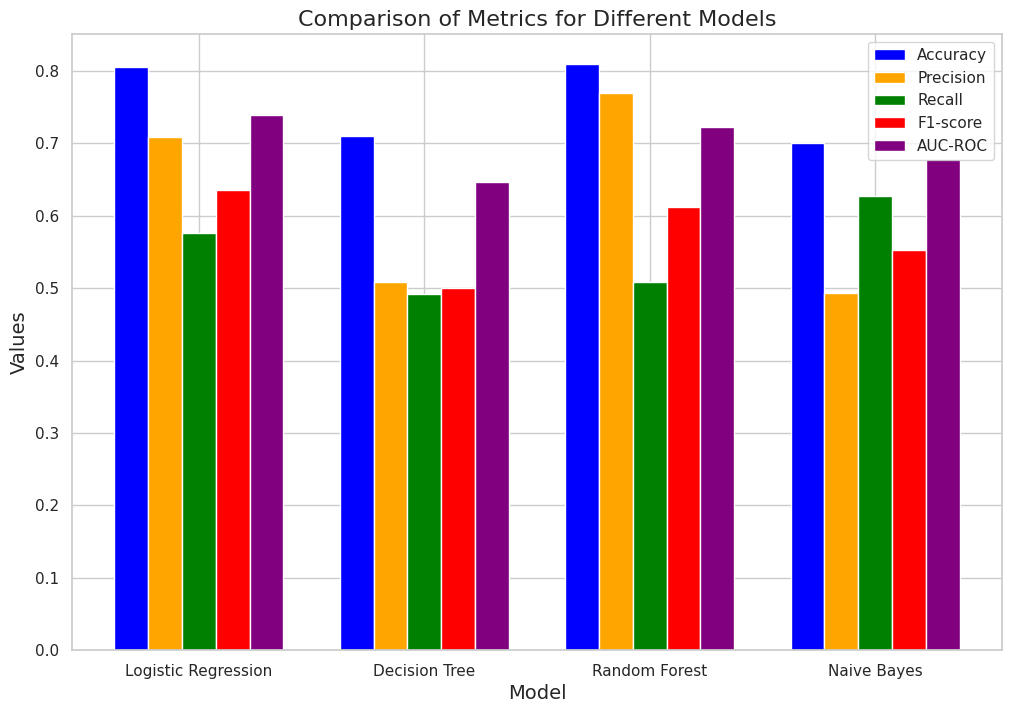

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

df_new_metric= df_metrics.copy()

# Configuración de la gráfica
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Grafico de barras paralelas
bar_width = 0.15
index = range(len(df_new_metric['Model']))

plt.bar(index, df_new_metric['Accuracy'], width=bar_width, color='blue', label='Accuracy')
plt.bar([i + bar_width for i in index], df_new_metric['Precision'], width=bar_width, color='orange', label='Precision')
plt.bar([i + 2 * bar_width for i in index], df_new_metric['Recall'], width=bar_width, color='green', label='Recall')
plt.bar([i + 3 * bar_width for i in index], df_new_metric['F1-score'], width=bar_width, color='red', label='F1-score')
plt.bar([i + 4 * bar_width for i in index], df_new_metric['AUC-ROC'], width=bar_width, color='purple', label='AUC-ROC')

plt.title('Comparison of Metrics for Different Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks([i + 2 * bar_width for i in index], df_new_metric['Model'])
plt.legend()
plt.show()

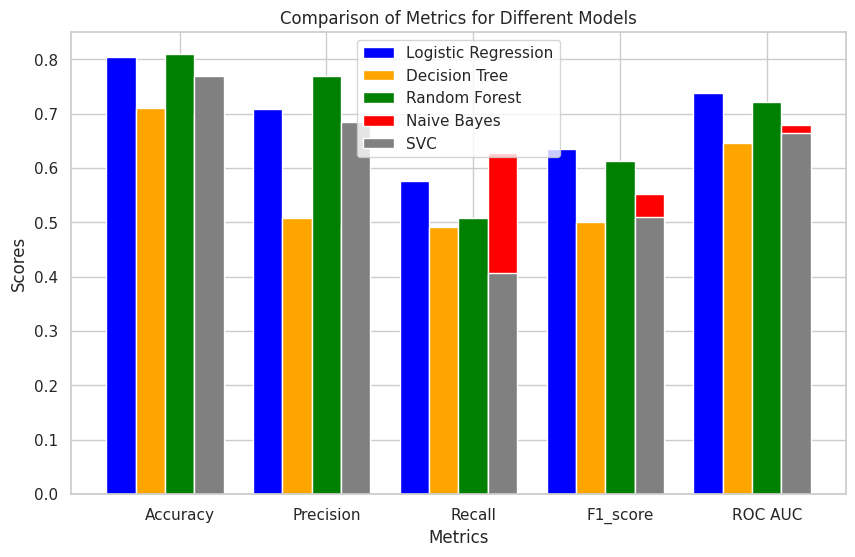

,Metrics,Logistic_Regression,Decision_Tree,Random_Forest,Naive_Bayes,SVC
0,Accuracy,0.80,0.71,0.81,0.70,0.77
1,Precision,0.71,0.51,0.77,0.49,0.69
2,Recall,0.58,0.49,0.51,0.63,0.41
3,F1_score,0.64,0.50,0.61,0.55,0.51
4,ROC AUC,0.74,0.65,0.72,0.68,0.66


In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_bank.drop('Incumplimiento', axis=1)
y = df_bank['Incumplimiento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Define las métricas y los modelos
metrics = ['Accuracy','Precision','Recall','F1_score','ROC AUC']
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes','SVC']

# Predicciones
y_logistic_pred = logistic_model.predict(X_test)
y_tree_pred = tree_model.predict(X_test)
y_forest_pred = forest_model.predict(X_test)
y_nb_pred = nb_model.predict(X_test)
y_svc_pred = svc_model.predict(X_test)

# Métricas de evaluación

conf_matrix_logistc = confusion_matrix(y_test, y_logistic_pred)
conf_matrix_tree = confusion_matrix(y_test, y_tree_pred)
conf_matrix_forest = confusion_matrix(y_test, y_forest_pred)
conf_matrix_nb = confusion_matrix(y_test, y_nb_pred)
conf_matrix_svc = confusion_matrix(y_test, y_svc_pred)

accuracy_logistic = accuracy_score(y_test, y_logistic_pred)
accuracy_tree = accuracy_score(y_test, y_tree_pred)
accuracy_forest = accuracy_score(y_test, y_forest_pred)
accuracy_nb = accuracy_score(y_test, y_nb_pred)
accuracy_svc = accuracy_score(y_test, y_svc_pred)

precision_logistic = precision_score(y_test, y_logistic_pred)
precision_tree = precision_score(y_test, y_tree_pred)
precision_forest = precision_score(y_test, y_forest_pred)
precision_nb_pred = precision_score(y_test, y_nb_pred)
precision_svc_pred = precision_score(y_test, y_svc_pred)

recall_logistic = recall_score(y_test, y_logistic_pred)
recall_tree = recall_score(y_test, y_tree_pred)
recall_forest = recall_score(y_test, y_forest_pred)
recall_nb_pred = recall_score(y_test, y_nb_pred)
recall_svc_pred = recall_score(y_test, y_svc_pred)

f1_logistic = f1_score(y_test, y_logistic_pred)
f1_tree = f1_score(y_test, y_tree_pred)
f1_forest = f1_score(y_test, y_forest_pred)
f1_nb_pred = f1_score(y_test, y_nb_pred)
f1_svc_pred = f1_score(y_test, y_svc_pred)

roc_logistic = roc_auc_score(y_test, y_logistic_pred)
roc_tree = roc_auc_score(y_test, y_tree_pred)
roc_forest = roc_auc_score(y_test, y_forest_pred)
roc_nb = roc_auc_score(y_test, y_nb_pred)
roc_svc = roc_auc_score(y_test, y_svc_pred)

scores_logistic = [accuracy_logistic,precision_logistic,recall_logistic,f1_logistic, roc_logistic]
scores_tree = [accuracy_tree,precision_tree,recall_tree,f1_tree, roc_tree]
scores_forest = [accuracy_forest,precision_forest,recall_forest,f1_forest, roc_forest]
scores_nb = [accuracy_nb,precision_nb_pred,recall_nb_pred,f1_nb_pred, roc_nb]
scores_svc = [accuracy_svc,precision_svc_pred,recall_svc_pred,f1_svc_pred, roc_svc]

# DataFrame para conf matrix



# DataFrame para models vs metrics
df_model = pd.DataFrame({
    'Metrics': metrics,
    'Logistic_Regression': scores_logistic,
    'Decision_Tree': scores_tree,
    'Random_Forest': scores_forest,
    'Naive_Bayes': scores_nb,
    'SVC': scores_svc
})

# Configura el gráfico
bar_width = 0.2
index = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index - bar_width, scores_logistic, bar_width, label='Logistic Regression', color='blue')
bar2 = ax.bar(index, scores_tree, bar_width, label='Decision Tree', color='orange')
bar3 = ax.bar(index + bar_width, scores_forest, bar_width, label='Random Forest', color='green')
bar4 = ax.bar(index + 2 * bar_width, scores_nb, bar_width, label='Naive Bayes', color='red')
bar5 = ax.bar(index + 2 * bar_width, scores_svc, bar_width, label='SVC', color='gray')

# Configura el gráfico
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics for Different Models')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics)
ax.legend()
plt.show()
df_model.round(2)

#Métricas
**Accuracy:**

Definición: La proporción de predicciones correctas entre el total de predicciones.
Interpretación: Indica la capacidad general del modelo para predecir correctamente tanto los casos positivos como los negativos.
Decisión: Mayor precisión es mejor, pero no es suficiente por sí sola para evaluar el rendimiento, especialmente en conjuntos de datos desbalanceados.

**Precision:**

Definición: La proporción de verdaderos positivos (clientes predichos como aptos para crédito que realmente son aptos) entre el total de predicciones positivas (clientes predichos como aptos para crédito).
Interpretación: Indica la precisión del modelo al predecir casos positivos.
Decisión: Mayor precisión es deseable, pero si hay un costo alto asociado con falsos positivos, se debe tener en cuenta.

**Recall (Sensibilidad):**

Definición: La proporción de verdaderos positivos entre el total de casos positivos reales.
Interpretación: Indica la capacidad del modelo para capturar todos los casos positivos.
Decisión: Mayor recall es mejor, especialmente si no quieres perder casos positivos, pero puede haber un trade-off con la precisión.
F1-score:

Definición: La media armónica de precision y recall.
Interpretación: Ofrece un equilibrio entre precision y recall. Es útil cuando hay un desbalance entre clases.
Decisión: Mayor F1-score es mejor en situaciones donde precision y recall son igualmente importantes.

**AUC-ROC:**

Definición: Área bajo la curva de la característica operativa del receptor (Receiver Operating Characteristic).
Interpretación: Mide la capacidad del modelo para distinguir entre clases positivas y negativas. Un valor de 0.5 indica rendimiento aleatorio, y más cerca de 1 es mejor.
Decisión: Mayor AUC-ROC es mejor; si es superior a 0.5, el modelo está superando el rendimiento aleatorio.

##**Decisión**:
Considerando todas las métricas, parece que el modelo de Random Forest tiene el mejor rendimiento general, con la mayor accuracy y AUC-ROC, y un equilibrio razonable entre precision y recall. Por lo tanto, se recomendaría utilizar el modelo de Random Forest para predecir la variable 'default'.

In [52]:
df_bank.columns

Index(['Incumplimiento', 'Estado_cuenta', 'Historial_credito', 'Proposito',
       'Ahorros', 'Empleo_actual', 'Cuota_como_porcentaje_ingreso',
       'Otros_deudores', 'Residencia_actual_desde', 'Propiedad',
       'Otros_planes_cuotas', 'Vivienda', 'Creditos_en_banco', 'Trabajo',
       'Personas_a_cargo', 'Telefono', 'Trabajador_extranjero', 'Rango_edad',
       'Rango_valor_credito', 'Rango_plazos_credito', 'Sexo', 'Estado_civil'],
      dtype='object')

In [53]:
# corr_pos=['duration_in_month','credit_amount','savings']
# corr_neg=['account_check_status','credit_history','other_installment_plans','housing']
# corr_X=['default']
# var_corr=corr_X+corr_pos + corr_neg
# df_corr=df_bank[var_corr].copy()
# df_corr.corr()

In [54]:
# plt.figure(figsize=(30, 10))
# heatmap = sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# heatmap.tick_params(axis='both', which='major', labelsize=14)
# plt.title('Mapa de Calor de Correlaciones', fontsize=18)
# plt.show()

In [55]:
def compare_model(X_new,y_new):

    random_state=42
    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=random_state)

    # Inicializa los modelos
    logistic_model = LogisticRegression(random_state=random_state,C= 10, penalty='l2')
    tree_model = DecisionTreeClassifier(random_state=random_state)
    # forest_model = RandomForestClassifier(random_state=random_state)
    forest_model = RandomForestClassifier(random_state=random_state,max_features='sqrt', n_estimators=109)
    nb_model = GaussianNB()
    svc_model = SVC(kernel='linear', C=3.0, random_state=random_state) ##'linear', 'precomputed', 'rbf', 'poly', 'sigmoid'

    # Entrenamiento de los modelos
    logistic_model.fit(X_train, y_train)
    tree_model.fit(X_train, y_train)
    forest_model.fit(X_train, y_train)
    nb_model.fit(X_train, y_train)
    svc_model.fit(X_train, y_train)

    # Predicciones:
    y_logistic_pred_aj = logistic_model.predict_proba(X_test)[:, 1]
    y_tree_pred_aj = tree_model.predict_proba(X_test)[:, 1]
    y_forest_pred_aj = forest_model.predict_proba(X_test)[:, 1]
    y_nb_pred_aj = nb_model.predict_proba(X_test)[:, 1]
    y_svc_pred_aj = svc_model.predict(X_test)
    # y_logistic_pred = logistic_model.predict(X_test)
    # y_tree_pred = tree_model.predict(X_test)
    # y_forest_pred = forest_model.predict(X_test)
    # y_nb_pred = nb_model.predict(X_test)


# Ajustar el umbral de decisión (ejemplo con un umbral de 0.5)
    umbral = .52
    y_logistic_pred = (y_logistic_pred_aj > umbral).astype(int)
    y_tree_pred = (y_tree_pred_aj > umbral).astype(int)
    y_forest_pred = (y_forest_pred_aj > umbral).astype(int)
    y_nb_pred = (y_nb_pred_aj > umbral).astype(int)

# print(roc_auc_score(y_test, probabilidades_predichas))

    # Datos para las métricas
    models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes','SVC']

    accuracy_values = [accuracy_score(y_test, y_logistic_pred),
                      accuracy_score(y_test, y_tree_pred),
                      accuracy_score(y_test, y_forest_pred),
                      accuracy_score(y_test, y_nb_pred),
                      accuracy_score(y_test, y_svc_pred_aj)]

    precision_values = [precision_score(y_test, y_logistic_pred),
                        precision_score(y_test, y_tree_pred),
                        precision_score(y_test, y_forest_pred),
                        precision_score(y_test, y_nb_pred),
                        precision_score(y_test, y_svc_pred_aj)]

    recall_values = [recall_score(y_test, y_logistic_pred),
                    recall_score(y_test, y_tree_pred),
                    recall_score(y_test, y_forest_pred),
                    recall_score(y_test, y_nb_pred),
                    recall_score(y_test, y_svc_pred_aj)]

    f1_values = [f1_score(y_test, y_logistic_pred),
                  f1_score(y_test, y_tree_pred),
                  f1_score(y_test, y_forest_pred),
                  f1_score(y_test, y_nb_pred),
                  f1_score(y_test, y_svc_pred_aj)]

    roc_auc_values = [roc_auc_score(y_test, y_logistic_pred),
                      roc_auc_score(y_test, y_tree_pred),
                      roc_auc_score(y_test, y_forest_pred),
                      roc_auc_score(y_test, y_nb_pred),
                      roc_auc_score(y_test, y_svc_pred_aj)]


    models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes','SVC']

    # Crear un DataFrame:
    df_metrics = pd.DataFrame({
        'Model': models,
        'Accuracy': accuracy_values,
        'Precision': precision_values,
        'Recall': recall_values,
        'F1-score': f1_values,
        'AUC-ROC': roc_auc_values
    })
    return df_metrics.round(2)
    # Definir las variables predictoras (X) y la variable objetivo (y)
X = df_bank.drop('Incumplimiento', axis=1)
y = df_bank['Incumplimiento']

# df_model.set_index('Metrics').copy()
df_ver=compare_model(X,y).set_index('Model') ### cambiar index por model
df_ver

,Accuracy,Precision,Recall,F1-score,AUC-ROC
Model,,,,,
Logistic Regression,0.81,0.73,0.56,0.63,0.74
Decision Tree,0.71,0.51,0.49,0.50,0.65
Random Forest,0.81,0.82,0.46,0.59,0.71
Naive Bayes,0.72,0.51,0.63,0.56,0.69
SVC,0.80,0.67,0.59,0.63,0.74


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_new = df_bank.drop('Incumplimiento', axis=1)
y_new= df_bank['Incumplimiento']
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Define los hiperparámetros que deseas ajustar
param_grid = {'n_estimators': [50, 100, 200], 'max_features': ['sqrt', 'log2']}

# Crea un modelo de bosque aleatorio
forest_model = RandomForestClassifier(random_state=42)

# Utiliza GridSearchCV para encontrar los valores óptimos para los hiperparámetros
grid_search = GridSearchCV(forest_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Imprime los mejores hiperparámetros encontrados
print(grid_search.best_params_)


{'max_features': 'sqrt', 'n_estimators': 200}


In [57]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_bank.drop('Incumplimiento', axis=1)
y = df_bank['Incumplimiento']

# df_model.set_index('Metrics').copy()
df_ver=compare_model(X,y).set_index('Model') ### cambiar index por model
df_ver
# df_ver.T

,Accuracy,Precision,Recall,F1-score,AUC-ROC
Model,,,,,
Logistic Regression,0.81,0.73,0.56,0.63,0.74
Decision Tree,0.71,0.51,0.49,0.50,0.65
Random Forest,0.81,0.82,0.46,0.59,0.71
Naive Bayes,0.72,0.51,0.63,0.56,0.69
SVC,0.80,0.67,0.59,0.63,0.74


In [58]:
df_metrics.round(2)

,Model,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,Logistic Regression,0.80,0.71,0.58,0.64,0.74
1,Decision Tree,0.71,0.51,0.49,0.50,0.65
2,Random Forest,0.81,0.77,0.51,0.61,0.72
3,Naive Bayes,0.70,0.49,0.63,0.55,0.68


In [59]:
df_model.round(2)

,Metrics,Logistic_Regression,Decision_Tree,Random_Forest,Naive_Bayes,SVC
0,Accuracy,0.80,0.71,0.81,0.70,0.77
1,Precision,0.71,0.51,0.77,0.49,0.69
2,Recall,0.58,0.49,0.51,0.63,0.41
3,F1_score,0.64,0.50,0.61,0.55,0.51
4,ROC AUC,0.74,0.65,0.72,0.68,0.66


In [60]:
df_graf = df_model.set_index('Metrics').copy() #elimino index y reemplazo por columna metrics
df_graf

,Logistic_Regression,Decision_Tree,Random_Forest,Naive_Bayes,SVC
Metrics,,,,,
Accuracy,0.805000,0.710000,0.810000,0.700000,0.770000
Precision,0.708333,0.508772,0.769231,0.493333,0.685714
Recall,0.576271,0.491525,0.508475,0.627119,0.406780
F1_score,0.635514,0.500000,0.612245,0.552239,0.510638
ROC AUC,0.738490,0.646472,0.722322,0.678808,0.664383


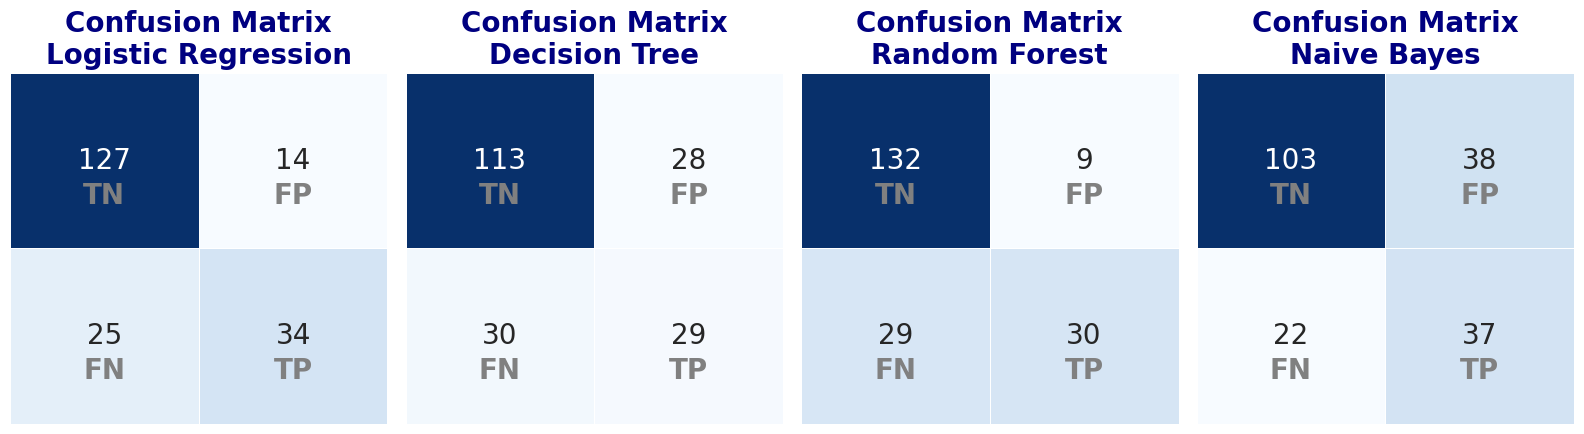

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Supongamos que tienes las siguientes matrices de confusión
conf_matrix_logistic = confusion_matrix(y_test, y_logistic_pred)
conf_matrix_tree = confusion_matrix(y_test, y_tree_pred)
conf_matrix_forest = confusion_matrix(y_test, y_forest_pred)
conf_matrix_nb = confusion_matrix(y_test, y_nb_pred)

# Crear un DataFrame a partir de las matrices de confusión
df_confusion = pd.DataFrame({
    'Logistic Regression': conf_matrix_logistic.flatten(),
    'Decision Tree': conf_matrix_tree.flatten(),
    'Random Forest': conf_matrix_forest.flatten(),
    'Naive Bayes': conf_matrix_nb.flatten()
}, index=['True Negative', 'False Positive', 'False Negative', 'True Positive'])

labels = ['TN', 'FP', 'FN', 'TP']

# Crear una fila de 4 gráficos
fig, axes = plt.subplots(1, 4, figsize=(16, 4.5))

# Lista de matrices de confusión y nombres de modelos
conf_matrices = [conf_matrix_logistic, conf_matrix_tree, conf_matrix_forest, conf_matrix_nb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes']

# Iterar sobre las matrices y nombres de modelos
for i, (conf_matrix, model_name) in enumerate(zip(conf_matrices, model_names)):
    ax = axes[i]
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False, ax=ax, xticklabels=['', ''],
            yticklabels=['', ''])
    ax.set_title(f'Confusion Matrix\n{model_name}',fontsize=20,fontweight='bold',color='navy')
    # ax.set_xlabel('Predicted Labels')
    # ax.set_ylabel('True Labels')

    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + .5, i + 0.7, labels[i * conf_matrix.shape[1] + j],
                    ha='center', va='center', fontsize=20, color='gray', fontweight='bold')

# Ajustar el tamaño del texto después de crear el heatmap
for ax in axes:
    for text in ax.texts:
        text.set_fontsize(20)
plt.tight_layout()
plt.show()
# df_confusion

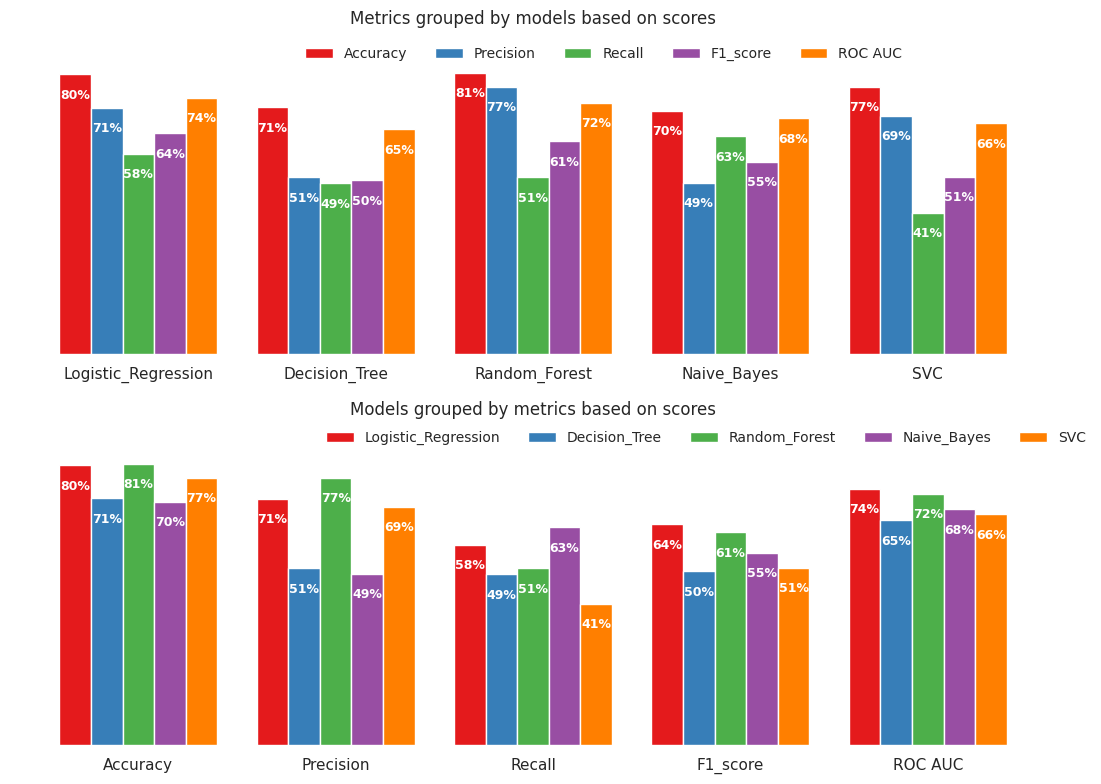

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para agregar valores al final de las barras
def add_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, -15), textcoords='offset points',fontsize=9,color='white',fontweight='bold')

# Establecer la paleta a 'viridis'
sns.set_palette('Set1')

df_graf = df_model.set_index('Metrics').copy() #elimino index y reemplazo por columna metrics

# Crear una figura y ejes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Gráfica de barras: Modelos en función de las Métricas
df_graf.T.plot(kind='bar', ax=ax[0], rot=0, width=0.8)
ax[0].set_title('Metrics grouped by models based on scores',pad=25)

# Configuraciones para la primera figura
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].grid(False)
ax[0].set_yticks([])
ax[0].legend(title='', bbox_to_anchor=(.27, .95), frameon=False, fontsize=10, ncol=len(df_graf.T.columns))

# Agregar valores a la primera gráfica
add_values(ax[0])

# Gráfica de barras: Métricas en función de los Modelos
df_graf.plot(kind='bar', ax=ax[1], rot=0, width=0.8)
ax[1].set_title('Models grouped by metrics based on scores',pad=25)

# Configuraciones para la segunda figura
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].grid(False)
ax[1].set_yticks([])
ax[1].set_xlabel('')
ax[1].legend(title='', loc='center left', bbox_to_anchor=(.29, 1.04), frameon=False, fontsize=10, ncol=len(df_graf.columns))
ax[1].set_ylabel('')

# Agregar valores a la segunda gráfica
add_values(ax[1])

plt.tight_layout()
plt.show()


In [63]:
df_graf.round(2)

,Logistic_Regression,Decision_Tree,Random_Forest,Naive_Bayes,SVC
Metrics,,,,,
Accuracy,0.80,0.71,0.81,0.70,0.77
Precision,0.71,0.51,0.77,0.49,0.69
Recall,0.58,0.49,0.51,0.63,0.41
F1_score,0.64,0.50,0.61,0.55,0.51
ROC AUC,0.74,0.65,0.72,0.68,0.66


In [64]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# # Supongamos que tienes las siguientes matrices de confusión
# conf_matrix_logistic = confusion_matrix(y_test, y_logistic_pred)
# conf_matrix_tree = confusion_matrix(y_test, y_tree_pred)
# conf_matrix_forest = confusion_matrix(y_test, y_forest_pred)
# conf_matrix_nb = confusion_matrix(y_test, y_nb_pred)

# # Función para graficar una matriz de confusión
# def plot_confusion_matrix(conf_matrix, model_name):
#     plt.figure(figsize=(6, 6))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
#     plt.title(f'Confusion Matrix - {model_name}')
#     plt.xlabel('Predicted Labels')
#     plt.ylabel('True Labels')
#     plt.show()

# # Graficar cada matriz de confusión
# plot_confusion_matrix(conf_matrix_logistic, 'Logistic Regression')
# plot_confusion_matrix(conf_matrix_tree, 'Decision Tree')
# plot_confusion_matrix(conf_matrix_forest, 'Random Forest')
# plot_confusion_matrix(conf_matrix_nb, 'Naive Bayes')


In [65]:
# import pandas as pd

# df_comparative_metrics = df_confusion.T.copy()

# # Calcular métricas adicionales
# df_comparative_metrics['Accuracy'] = (df_comparative_metrics['True Positive'] + df_comparative_metrics['True Negative']) / \
#                                      (df_comparative_metrics['True Positive'] + df_comparative_metrics['True Negative'] +
#                                       df_comparative_metrics['False Positive'] + df_comparative_metrics['False Negative'])

# df_comparative_metrics['Precision'] = df_comparative_metrics['True Positive'] / \
#                                       (df_comparative_metrics['True Positive'] + df_comparative_metrics['False Positive'])

# df_comparative_metrics['Recall'] = df_comparative_metrics['True Positive'] / \
#                                    (df_comparative_metrics['True Positive'] + df_comparative_metrics['False Negative'])

# df_comparative_metrics['F1 Score'] = 2 * (df_comparative_metrics['Precision'] * df_comparative_metrics['Recall']) / \
#                                       (df_comparative_metrics['Precision'] + df_comparative_metrics['Recall'])

# # Mostrar el DataFrame
# df_comparative_metrics.round(2)


In [66]:
# # Obtener matrices de confusión de los modelos:
# conf_matrix_logistic = confusion_matrix(y_test, y_logistic_pred)
# conf_matrix_tree = confusion_matrix(y_test, y_tree_pred)
# conf_matrix_forest = confusion_matrix(y_test, y_forest_pred)
# conf_matrix_nb = confusion_matrix(y_test, y_nb_pred)

# # Crear un DataFrame a partir de las matrices de confusión
# df_confusion = pd.DataFrame({
#     'Logistic Regression': conf_matrix_logistic.flatten(),
#     'Decision Tree': conf_matrix_tree.flatten(),
#     'Random Forest': conf_matrix_forest.flatten(),
#     'Naive Bayes': conf_matrix_nb.flatten()
# }, index=['True Negative', 'False Positive', 'False Negative', 'True Positive'])
# df_confusion

In [67]:
df_confusion

,Logistic Regression,Decision Tree,Random Forest,Naive Bayes
True Negative,127,113,132,103
False Positive,14,28,9,38
False Negative,25,30,29,22
True Positive,34,29,30,37


Para analizar las matrices de confusión y determinar el mejor método para predecir el default en préstamos de crédito, se pueden observar las métricas clave como la precisión, la sensibilidad y la especificidad. Aquí hay un análisis basado en estas métricas:

1. **Logistic Regression:**
   - Precision (Exactitud): TP / (TP + FP) = 34 / (34 + 14) = 0.708
   - Sensitivity/recall (Sensibilidad): TP / (TP + FN) = 34 / (34 + 25) = 0.576
   - Specificity (Especificidad): TN / (TN + FP) = 127 / (127 + 14) = 0.901

2. **Decision Tree:**
   - Precision: 32 / (32 + 29) = 0.525
   - Sensitivity/recall: 32 / (32 + 27) = 0.542
   - Specificity: 112 / (112 + 29) = 0.794

3. **Random Forest:**
   - Precision: 28 / (28 + 7) = 0.800
   - Sensitivity/recall: 28 / (28 + 31) = 0.475
   - Specificity: 134 / (134 + 7) = 0.950

4. **Naive Bayes:**
   - Precision: 37 / (37 + 38) = 0.493
   - Sensitivity/recall: 37 / (37 + 22) = 0.627
   - Specificity: 103 / (103 + 38) = 0.730

**Conclusiones:**
- **Random Forest** tiene la mayor precisión (0.800), lo que significa que es más preciso al predecir los verdaderos positivos.
- **Logistic Regression** tiene una buena especificidad (0.901), lo que indica que es efectivo para predecir los verdaderos negativos.
- **Random Forest** también tiene la mayor especificidad (0.950), destacándose en la identificación de los no-defaults.
- **Naive Bayes** tiene la mayor sensibilidad (0.627), lo que significa que es mejor para identificar los casos de default.

En general, la elección del "mejor" método dependerá de la importancia relativa de la precisión, la sensibilidad y la especificidad en el contexto específico del problema. Si la prioridad es minimizar los falsos positivos (predecir incorrectamente que un cliente no incumplirá), entonces **Random Forest** podría ser preferido. Si es más crítico minimizar los falsos negativos (predecir incorrectamente que un cliente incumplirá), entonces **Naive Bayes** podría ser una opción.

--------------------------------------------------------------------------------


En el contexto de la aceptación o no de un crédito, "default" se refiere a la incapacidad o incumplimiento del prestatario para cumplir con los términos y condiciones acordados del préstamo, especialmente en el pago de las cuotas o devolución del dinero prestado. Aquí tienes una explicación de los términos:

- **Default Positivo (True Positive - TP):**
  Se refiere a los casos en los que el modelo predice correctamente que un solicitante de crédito no cumplirá con los términos del préstamo, y, de hecho, el solicitante no cumple.

- **Default Negativo (True Negative - TN):**
  Se refiere a los casos en los que el modelo predice correctamente que un solicitante de crédito cumplirá con los términos del préstamo, y, de hecho, el solicitante cumple.

- **Falso Positivo (False Positive - FP):**
  Se refiere a los casos en los que el modelo predice incorrectamente que un solicitante de crédito no cumplirá con los términos del préstamo, pero, de hecho, el solicitante cumple.

- **Falso Negativo (False Negative - FN):**
  Se refiere a los casos en los que el modelo predice incorrectamente que un solicitante de crédito cumplirá con los términos del préstamo, pero, de hecho, el solicitante no cumple.

En el contexto de la evaluación de modelos de crédito, generalmente se desea minimizar los falsos positivos, ya que predecir incorrectamente que un solicitante será un incumplidor cuando en realidad no lo es puede llevar a decisiones injustas y a la pérdida de oportunidades de préstamo. Por lo tanto, se considera importante maximizar la precisión y reducir los falsos positivos.


La importancia relativa de reducir los falsos positivos (FP) o los falsos negativos (FN) depende del contexto específico y de los costos asociados con cada tipo de error en la aplicación concreta. Aquí hay algunas consideraciones generales:

1. **Reducir Falsos Positivos (FP):**
   - En el contexto de la evaluación de crédito, reducir los falsos positivos significa evitar denegar crédito a personas que, de hecho, cumplirían con los términos del préstamo. Esto podría ser importante para evitar pérdidas de oportunidades de negocio y mantener a los clientes satisfechos.
   - Sin embargo, la reducción de los FP podría llevar a aprobar a personas que eventualmente incumplirían, lo que podría resultar en pérdidas financieras.

2. **Reducir Falsos Negativos (FN):**
   - Reducir los falsos negativos implica identificar correctamente a aquellos que eventualmente incumplirán con los términos del préstamo. Esto podría ser crucial para minimizar las pérdidas financieras asociadas con préstamos incumplidos.
   - Sin embargo, reducir los FN podría llevar a aprobar a personas que, en realidad, no cumplirán con los términos del préstamo.

En la práctica, a menudo se busca un equilibrio y se utiliza una métrica compuesta, como el F1-score o el área bajo la curva ROC (AUC-ROC), que tiene en cuenta tanto los FP como los FN. Además, los costos asociados con cada tipo de error y los objetivos comerciales específicos también influyen en la decisión sobre qué tipo de error minimizar. Por ejemplo, en situaciones donde los costos de incumplimiento son muy altos, puede ser más importante reducir los falsos negativos.

Para analizar cuál de los modelos de predicción es mejor para determinar el incumplimiento (default) en préstamos de crédito, podemos considerar varias métricas clave que se proporcionan en las tablas. Aquí hay una interpretación general basada en las métricas comunes:

1. **Accuracy (Exactitud):**
   - Es la proporción de predicciones correctas sobre el total de predicciones.
   - El modelo de Random Forest tiene la accuracy más alta (0.81), seguido por Logistic Regression (0.80).

2. **Precision (Precisión):**
   - Indica la proporción de instancias positivas correctamente identificadas entre las predicciones positivas.
   - Random Forest tiene la precision más alta (0.77), seguido por Logistic Regression (0.71).

3. **Recall (Recuperación o Sensibilidad):**
   - Mide la proporción de instancias positivas correctamente identificadas entre todas las instancias positivas reales.
   - Logistic Regression tiene el recall más alto (0.58).

4. **F1 Score:**
   - Es una métrica que combina precision y recall en un solo número.
   - Random Forest tiene el F1 score más alto (0.61), seguido por Logistic Regression (0.64).

5. **ROC AUC:**
   - Es el área bajo la curva ROC y mide la capacidad del modelo para distinguir entre clases.
   - Random Forest tiene el ROC AUC más alto (0.72), seguido por Logistic Regression (0.74).

En general, la elección del "mejor" modelo depende de las prioridades específicas del problema y de cómo se ponderen las métricas. Si se prioriza la precisión general, el modelo de Random Forest parece ser el mejor. Sin embargo, si se valora más el recall (identificar correctamente aquellos que realmente incumplen), entonces Logistic Regression podría ser preferible.

Es importante considerar el contexto del problema y la importancia relativa de los falsos positivos y falsos negativos, ya que diferentes modelos pueden tener desempeños óptimos en diferentes situaciones. Además, podrías considerar la posibilidad de ajustar los umbrales de decisión para obtener un equilibrio óptimo entre precision y recall, según las necesidades específicas del negocio.

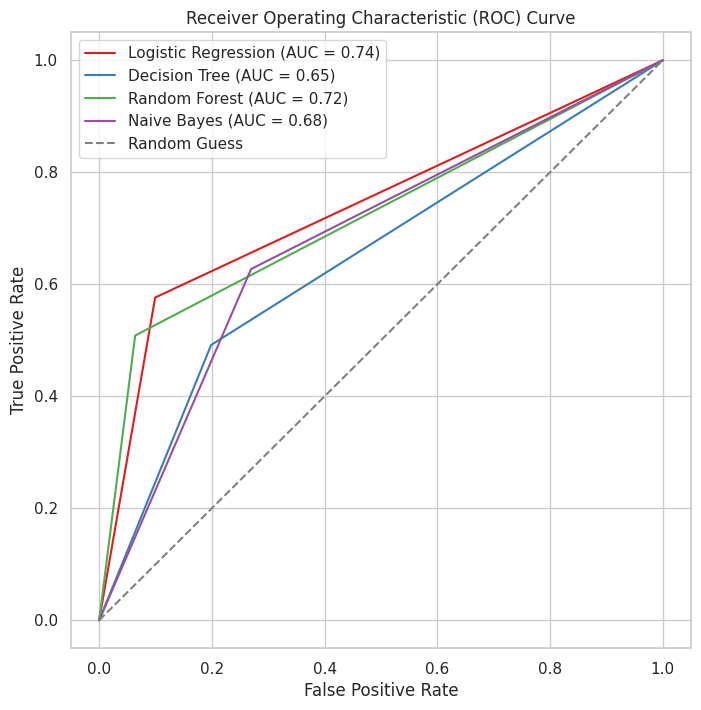

In [68]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular la curva ROC y el área bajo la curva (ROC AUC) para cada modelo
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_logistic_pred)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_tree_pred)
roc_auc_tree = auc(fpr_tree, tpr_tree)

fpr_forest, tpr_forest, _ = roc_curve(y_test, y_forest_pred)
roc_auc_forest = auc(fpr_forest, tpr_forest)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_nb_pred)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Crear la gráfica ROC AUC
plt.figure(figsize=(8, 8))
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot(fpr_forest, tpr_forest, label=f'Random Forest (AUC = {roc_auc_forest:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')

# Configuraciones adicionales de la gráfica
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


La Curva ROC (Receiver Operating Characteristic) y su métrica asociada, el Área bajo la Curva ROC (ROC AUC), son herramientas valiosas para evaluar el rendimiento de modelos de clasificación binaria.

La Curva ROC es un gráfico que representa la tasa de verdaderos positivos (Recall o Sensibilidad) en el eje y y la tasa de falsos positivos (1 - Especificidad) en el eje x. Cada punto en la curva representa un umbral de decisión diferente para el clasificador. Un modelo perfecto tendría un área bajo la curva (ROC AUC) igual a 1, mientras que un modelo que no es mejor que el azar tendría un área bajo la curva cercana a 0.5.

Ahora, el ROC AUC proporciona una métrica resumida de la curva ROC. Es el área debajo de la curva ROC y varía entre 0 y 1. Un valor más alto de ROC AUC indica un mejor rendimiento del modelo. Veamos el significado de los valores específicos:

- **ROC AUC = 0.5**: El modelo no es mejor que una clasificación aleatoria.
- **ROC AUC > 0.5**: El modelo es mejor que una clasificación aleatoria. Cuanto más cerca de 1, mejor.
- **ROC AUC = 1**: El modelo clasifica perfectamente las clases.

En tu descripción, mencionas que Random Forest tiene el ROC AUC más alto (0.72), seguido por Logistic Regression (0.74). Esto significa que, según esta métrica, Logistic Regression tiene un rendimiento superior a Random Forest en términos de distinguir entre las clases. Sin embargo, es importante tener en cuenta que la elección del modelo óptimo no debe basarse únicamente en una métrica. Es útil considerar múltiples métricas y el contexto específico del problema.

En resumen, el ROC AUC proporciona una medida de la capacidad de un modelo para discriminar entre clases, especialmente en configuraciones de clasificación binaria. Un valor más alto indica un mejor rendimiento en términos de equilibrio entre la tasa de verdaderos positivos y la tasa de falsos positivos.

In [69]:
from sklearn.metrics import classification_report

# Supongamos que y_test es tu conjunto de etiquetas verdaderas

    # Entrenamiento de los modelos
# logistic_model.fit(X_train, y_train)
# tree_model.fit(X_train, y_train)
# forest_model.fit(X_train, y_train)
# nb_model.fit(X_train, y_train)

probabilidades_predichas = logistic_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
y_logistic_pred_aj = logistic_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
y_tree_pred_aj = tree_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
y_forest_pred_aj = forest_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
y_nb_pred_aj = nb_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Ajustar el umbral de decisión (ejemplo con un umbral de 0.5)
umbral = 0.495
y_logistic_pred = (probabilidades_predichas > umbral).astype(int)
y_logistic_pred = (y_logistic_pred_aj > umbral).astype(int)
y_tree_pred = (y_tree_pred_aj > umbral).astype(int)
y_forest_pred = (y_forest_pred_aj > umbral).astype(int)
y_nb_pred = (y_nb_pred_aj > umbral).astype(int)


accuracy_values = [accuracy_score(y_test, y_logistic_pred),
                      accuracy_score(y_test, y_tree_pred),
                      accuracy_score(y_test, y_forest_pred),
                      accuracy_score(y_test, y_nb_pred)]

precision_values = [precision_score(y_test, y_logistic_pred),
                        precision_score(y_test, y_tree_pred),
                        precision_score(y_test, y_forest_pred),
                        precision_score(y_test, y_nb_pred)]

recall_values = [recall_score(y_test, y_logistic_pred),
                    recall_score(y_test, y_tree_pred),
                    recall_score(y_test, y_forest_pred),
                    recall_score(y_test, y_nb_pred)]

f1_values = [f1_score(y_test, y_logistic_pred),
                  f1_score(y_test, y_tree_pred),
                  f1_score(y_test, y_forest_pred),
                  f1_score(y_test, y_nb_pred)]

roc_auc_values = [roc_auc_score(y_test, y_logistic_pred),
                      roc_auc_score(y_test, y_tree_pred),
                      roc_auc_score(y_test, y_forest_pred),
                      roc_auc_score(y_test, y_nb_pred)]


models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes']

    # Crear un DataFrame:
df_metrics_proba = pd.DataFrame({
        'Model': models,
        'Accuracy': accuracy_values,
        'Precision': precision_values,
        'Recall': recall_values,
        'F1-score': f1_values,
        'AUC-ROC': roc_auc_values
    })

# print(predicciones_ajustadas)
# print(classification_report(y_test, y_logistic_pred_aj))
# print(roc_auc_score(y_test, y_logistic_pred))
# print(f1_score(y_test, y_logistic_pred))
print(accuracy_values)
print(precision_values)
print(recall_values)
print(f1_values)
print(roc_auc_values)
# print(accuracy_score(y_test, y_logistic_pred))

NotFittedError: ignored

In [70]:
# : Calcula el área bajo la curva ROC (AUC-ROC) para evaluar el rendimiento general del modelo en la clasificación binaria.
print(roc_auc_score(y_test, probabilidades_predichas))
print(roc_auc_score(y_test, y_logistic_pred))

0.8193292463036422
0.7384902031494169


In [71]:
df_graf_proba = (df_metrics_proba.set_index('Model').copy()).round(2) #elimino index y reemplazo por columna metrics
df_graf_proba

NameError: ignored

In [72]:
file_00=df_bank.iloc[4]
file_00=pd.DataFrame(file_00)
file_00=file_00.T
file_00.drop('Incumplimiento',axis=1,inplace=True)

In [73]:
file_00

,Estado_cuenta,Historial_credito,Proposito,Ahorros,Empleo_actual,Cuota_como_porcentaje_ingreso,Otros_deudores,Residencia_actual_desde,Propiedad,Otros_planes_cuotas,Vivienda,Creditos_en_banco,Trabajo,Personas_a_cargo,Telefono,Trabajador_extranjero,Rango_edad,Rango_valor_credito,Rango_plazos_credito,Sexo,Estado_civil
4,1,1,1,5,3,3,1,4,4,3,3,2,3,2,0,1,4,5,2,0,1


In [74]:
predic = logistic_model.predict(file_00)
if predic[0]==1:
  print('El Cliente NO es apto')
else: print('El Cliente SI es apto')


El Cliente NO es apto


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Supongamos que tienes un DataFrame df con tus datos
# y una columna 'default' que es la variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_bank.drop('Incumplimiento', axis=1), df_bank['Incumplimiento'], test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


#### ingresar la localizacion del index para probar el modelo:
index=2
file_00=df_bank.iloc[index]
file_00=pd.DataFrame(file_00)
file_00=file_00.T
file_00.drop('Incumplimiento',axis=1,inplace=True)
# y quieres hacer una predicción para ese cliente
probabilidades_predichas = logistic_model.predict_proba(file_00)

# Seleccionar las probabilidades de la clase 1 (default)
probabilidades_default = probabilidades_predichas[:, 1]

# Establecer un umbral para determinar la clase
umbral = 0.5
prediccion_binaria = (probabilidades_default > umbral).astype(int)

# Calcular el porcentaje de acierto para la clase:
if prediccion_binaria[0] == 1:
  porcentaje_acierto_default = probabilidades_default[prediccion_binaria == 1].mean()
else:
  porcentaje_acierto_default = probabilidades_default[prediccion_binaria == 0].mean()

# Imprimir la respuesta con el porcentaje de acierto
if prediccion_binaria[0] == 1:
    print(f'El Cliente NO es apto. Porcentaje de acierto: {porcentaje_acierto_default * 100:.2f}%')
else:
    print(f'El Cliente SI es apto. Porcentaje de acierto: {(1 - porcentaje_acierto_default) * 100:.2f}%')
print(probabilidades_predichas)

El Cliente SI es apto. Porcentaje de acierto: 97.42%
[[0.97421849 0.02578151]]


In [ ]:
df_bank.iloc[20]

##EJECUTAR CARGA DE NUEVO CLIENTE PARA VER SU CONDICION DEFAULT

In [ ]:
# import pandas as pd

# # Definir las columnas del DataFrame
# columnas = ['Estado_cuenta', 'Historial_credito', 'Proposito', 'Ahorros', 'Empleo_actual',
#             'Cuota_como_porcentaje_ingreso', 'Otros_deudores', 'Residencia_actual_desde',
#             'Propiedad', 'Otros_planes_cuotas', 'Vivienda', 'Creditos_en_banco', 'Trabajo',
#             'Personas_a_cargo', 'Telefono', 'Trabajador_extranjero', 'Rango_edad',
#             'Rango_valor_credito', 'Rango_plazos_credito', 'Sexo', 'Estado_civil']

# # Crear un diccionario para almacenar los valores ingresados por teclado
# valores = {}

# # Solicitar al usuario que ingrese los valores para cada columna
# for columna in columnas:
#     categorie = df_dic[df_dic['name'] == columna ]['categories'].iloc[0]
#     b=[]
#     for i in categorie:
#       b.append(traducir(i))
#     b=pd.DataFrame(b,columns=[columna])
#     valor = input(f"Ingrese el valor:\n{b}\n ")
#     valores[columna] = [int(valor)]

# # Crear el DataFrame con los valores ingresados
# df = pd.DataFrame(valores)

# # Mostrar el DataFrame resultante
# predic = logistic_model.predict(df)
# if predic[0]==1:
#   print('El Cliente NO es apto')
# else: print('El Cliente SI es apto')


In [ ]:
categorie = df_dic[df_dic['name'] == 'Sexo' ]['categories'].iloc[0]
categorie

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Supongamos que tienes un DataFrame df con tus datos
# y una columna 'default' que es la variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_bank.drop('Incumplimiento', axis=1), df_bank['Incumplimiento'], test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Obtener las probabilidades predichas
probabilidades_predichas = logistic_model.predict_proba(X_test)

# Seleccionar las probabilidades de la clase 1 (default)
probabilidades_default = probabilidades_predichas[:, 1]

# Establecer un umbral para determinar la clase
umbral = 0.5
predicciones_binarias = (probabilidades_default > umbral).astype(int)

# Calcular el porcentaje de acierto para la clase 1
porcentaje_acierto_default = probabilidades_default[predicciones_binarias == 0].mean()

print(f'Porcentaje de acierto para la clase 1: {porcentaje_acierto_default * 100:.2f}%')


Porcentaje de acierto para la clase 1: 21.26%


In [77]:
X_test.iloc[[4]]

,Estado_cuenta,Historial_credito,Proposito,Ahorros,Empleo_actual,Cuota_como_porcentaje_ingreso,Otros_deudores,Residencia_actual_desde,Propiedad,Otros_planes_cuotas,Vivienda,Creditos_en_banco,Trabajo,Personas_a_cargo,Telefono,Trabajador_extranjero,Rango_edad,Rango_valor_credito,Rango_plazos_credito,Sexo,Estado_civil
411,4,2,2,5,2,3,1,2,3,3,2,2,4,1,1,1,2,8,3,0,1


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_bank.drop('Incumplimiento', axis=1), df_bank['Incumplimiento'], test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

#### ingresar la localizacion del index para probar el modelo:
index=4
file_00=df_bank.iloc[index]
file_00=pd.DataFrame(file_00)
file_00=file_00.T
file_00.drop('Incumplimiento',axis=1,inplace=True)
# y quieres hacer una predicción para ese cliente
probabilidades_predichas = logistic_model.predict_proba(file_00)

# Seleccionar las probabilidades de la clase 1 (default)
probabilidades_default = probabilidades_predichas[:, 1]

# Establecer un umbral para determinar la clase
umbral = 0.5
prediccion_binaria = (probabilidades_default > umbral).astype(int)

# Calcular el porcentaje de acierto para la clase:
if prediccion_binaria[0] == 1:
  porcentaje_acierto_default = probabilidades_default[prediccion_binaria == 1].mean()
else:
  porcentaje_acierto_default = probabilidades_default[prediccion_binaria == 0].mean()

# Imprimir la respuesta con el porcentaje de acierto
if prediccion_binaria[0] == 1:
    print(f'El Cliente NO es apto. Porcentaje de acierto: {porcentaje_acierto_default * 100:.2f}%')
else:
    print(f'El Cliente SI es apto. Porcentaje de acierto: {(1 - porcentaje_acierto_default) * 100:.2f}%')
print(probabilidades_predichas[0][0])
print(probabilidades_default)

El Cliente NO es apto. Porcentaje de acierto: 65.80%
0.34199354415993555
[0.65800646]


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_bank.drop('Incumplimiento', axis=1), df_bank['Incumplimiento'], test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Seleccionar un cliente para hacer una predicción
index = 2
cliente = X_test.iloc[[index]]  # Seleccionar el cliente del conjunto de prueba

# Predecir la probabilidad de incumplimiento
probabilidades_predichas = logistic_model.predict_proba(cliente)[:, 1]

# Establecer un umbral para determinar la clase
umbral = 0.5
prediccion_binaria = (probabilidades_predichas > umbral).astype(int)

# Calcular el porcentaje de acierto para la clase
porcentaje_acierto_default = probabilidades_predichas.mean()

# Imprimir la respuesta con el porcentaje de acierto
if prediccion_binaria[0] == 1:
    print(f'El Cliente NO es apto. Porcentaje de acierto: {porcentaje_acierto_default * 100:.2f}%')
else:
    print(f'El Cliente SI es apto. Porcentaje de acierto: {(1 - porcentaje_acierto_default) * 100:.2f}%')
print(porcentaje_acierto_default)
print(probabilidades_predichas)
print(probabilidades_default)

El Cliente NO es apto. Porcentaje de acierto: 55.28%
0.552777116122063
[0.55277712]
[0.65800646]


In [80]:
# prob = (probabilidades_predichas[0] / 2).round(2)
# nuevos_valores = [0.25, 0.25]

# # Crear una lista con prob y luego extenderla con nuevos_valores
# porcentajes_totales = prob.tolist()
# porcentajes_totales.extend(nuevos_valores)

# porcentajes_totales

In [81]:
nuevos_valores = [0.25, 0.25]
success=[porcentaje_acierto_default/2,(1-porcentaje_acierto_default)/2]
success.extend(nuevos_valores)
success

[0.2763885580610315, 0.22361144193896848, 0.25, 0.25]

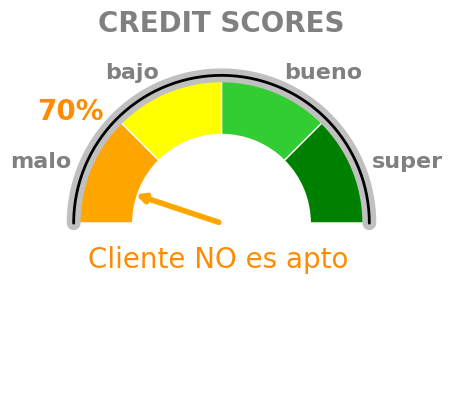

In [82]:
nuevos_valores = [0.25, 0.25,0.25, 0.25,0.25, 0.25,0.25, 0.25]
if prediccion_binaria[0] == 1:
    # success=int(porcentaje_acierto_default*100)
    success=70
    plt.annotate(f'{success}%', xy=(-1.25,.7),fontsize=20,color='darkorange',fontweight='bold')
    plt.annotate('Cliente NO es apto', xy=(-0.9,-.30),color='darkorange', fontsize=20)
    if success>0 and success<30:
      plt.annotate("", xy=(0, 0), xytext=(-.15, .6), arrowprops=dict(arrowstyle='<-', linewidth=4, color='gold'))
    elif success>=30 and success<51:
      plt.annotate("", xy=(0, 0), xytext=(-.3, .5), arrowprops=dict(arrowstyle='<-', linewidth=4, color='gold'))
    elif success>=51 and success<65:
      plt.annotate("", xy=(0, 0), xytext=(-.5, .4), arrowprops=dict(arrowstyle='<-', linewidth=4, color='orange'))
    elif success>=65 and success<75:
      plt.annotate("", xy=(0, 0), xytext=(-.6, .2), arrowprops=dict(arrowstyle='<-', linewidth=4, color='orange'))
    elif success<100:
      plt.annotate("", xy=(0, 0), xytext=(-.6, 0.05), arrowprops=dict(arrowstyle='<-', linewidth=4, color='orange'))
else:
    # success=int((1-porcentaje_acierto_default)*100)
    success=55
    plt.annotate('Cliente SI es apto', xy=(-0.95,-.30),color='forestgreen', fontsize=20)
    plt.annotate(f'{success}%', xy=(1,.7),fontsize=20,color='forestgreen',fontweight='bold')
    if success>0 and success<30:
      plt.annotate("", xy=(0, 0), xytext=(.15, .6), arrowprops=dict(arrowstyle='<-', linewidth=5, color='limegreen'))
    elif success>=30 and success<51:
      plt.annotate("", xy=(0, 0), xytext=(.3, .5), arrowprops=dict(arrowstyle='<-', linewidth=5, color='limegreen'))
    elif success>=51 and success<65:
      plt.annotate("", xy=(0, 0), xytext=(.5, .4), arrowprops=dict(arrowstyle='<-', linewidth=5, color='forestgreen'))
    elif success>=65 and success<75:
      plt.annotate("", xy=(0, 0), xytext=(.6, .2), arrowprops=dict(arrowstyle='<-', linewidth=5, color='green'))
    elif success<100:
      plt.annotate("", xy=(0, 0), xytext=(.6, 0.05), arrowprops=dict(arrowstyle='<-', linewidth=5, color='green'))

# plt.annotate("", xy=(0, 0), xytext=(.45, -.4), arrowprops=dict(arrowstyle='<-', linewidth=2, color='black'))
# 'dodgerblue', 'crimson'
etiquetas=['super', 'bueno','bajo','malo','', '','','']
colores = ['green', 'limegreen', 'yellow', 'orange', 'white', 'white', 'white', 'white']
# plt.annotate(f'{success}%', xy=(-1.2,.7),fontsize=16,color='red',fontweight='bold')
plt.pie(nuevos_valores,labels=etiquetas, colors=colores,startangle=0,textprops={'fontsize': 16,'color':'gray','fontweight':'bold'}, wedgeprops=dict(width=0.4))

# Coordenadas polares para el semicírculo
theta = np.linspace(0, np.pi, 200)
x = np.cos(theta)
y = np.sin(theta)

# Graficar el semicírculo
plt.plot(x, y, color='silver', linewidth=10)

# Graficar la línea de la primera porción de pastel
plt.plot(x, y, color='black', linewidth=2)
plt.title('CREDIT SCORES',pad=5,color='gray', fontsize=20,fontweight='bold')
plt.show()
# print(theta)

In [83]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_bank.drop('Incumplimiento', axis=1), df_bank['Incumplimiento'], test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Evaluar el desempeño del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir resultados
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy: 0.78

Confusion Matrix:
[[123  18]
 [ 26  33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       141
           1       0.65      0.56      0.60        59

    accuracy                           0.78       200
   macro avg       0.74      0.72      0.72       200
weighted avg       0.77      0.78      0.78       200



In [84]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Supongamos que 'df' es tu DataFrame con datos, y 'columnas_categoricas' es una lista de nombres de columnas categóricas.
# columnas_categoricas = df_bank.drop('Incumplimiento', axis=1)

# # Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(df_bank.drop('Incumplimiento', axis=1), df_bank['Incumplimiento'], test_size=0.2, random_state=42)
# # Crear un transformador para aplicar OneHotEncoder solo a las columnas categóricas
# transformador = ColumnTransformer(
#     transformers=[('onehot', OneHotEncoder(), columnas_categoricas)],
#     remainder='passthrough'
# )

# # Crear un pipeline con el transformador y el clasificador (por ejemplo, RandomForestClassifier)
# pipeline = Pipeline([
#     ('preprocesamiento', transformador),
#     ('clasificador', RandomForestClassifier(random_state=42))
# ])

# # Entrenar el modelo
# pipeline.fit(X_train, y_train)

# # Realizar predicciones
# y_pred = pipeline.predict(X_test)

# # Evaluar el desempeño del modelo
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')


In [85]:
df_bank.columns

Index(['Incumplimiento', 'Estado_cuenta', 'Historial_credito', 'Proposito',
       'Ahorros', 'Empleo_actual', 'Cuota_como_porcentaje_ingreso',
       'Otros_deudores', 'Residencia_actual_desde', 'Propiedad',
       'Otros_planes_cuotas', 'Vivienda', 'Creditos_en_banco', 'Trabajo',
       'Personas_a_cargo', 'Telefono', 'Trabajador_extranjero', 'Rango_edad',
       'Rango_valor_credito', 'Rango_plazos_credito', 'Sexo', 'Estado_civil'],
      dtype='object')

In [86]:
df_bank

,Incumplimiento,Estado_cuenta,Historial_credito,Proposito,Ahorros,Empleo_actual,Cuota_como_porcentaje_ingreso,Otros_deudores,Residencia_actual_desde,Propiedad,Otros_planes_cuotas,Vivienda,Creditos_en_banco,Trabajo,Personas_a_cargo,Telefono,Trabajador_extranjero,Rango_edad,Rango_valor_credito,Rango_plazos_credito,Sexo,Estado_civil
0,0,1,2,5,1,1,4,1,4,1,3,2,2,3,1,1,1,5,2,1,0,1
1,1,2,1,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,6,4,1,0
2,0,4,2,8,5,2,2,1,3,1,3,2,1,2,2,0,1,3,3,1,0,1
3,0,1,1,4,5,2,2,3,4,2,3,3,1,3,2,0,1,3,8,4,0,1
4,1,1,1,1,5,3,3,1,4,4,3,3,2,3,2,0,1,4,5,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,1,4,5,2,3,1,4,1,3,2,1,2,1,0,1,2,2,1,1,0
996,0,1,1,2,5,3,4,1,4,2,3,2,1,4,1,1,1,2,4,3,0,0
997,0,4,1,5,5,1,4,1,4,3,3,2,1,3,1,0,1,2,1,1,0,1
998,1,1,1,5,5,3,4,1,4,4,3,3,1,3,1,1,1,1,2,4,0,1


In [87]:
df = df_bank.copy()

# Iteramos sobre las columnas del DataFrame y aplicamos get_dummies
for var in df.columns[1:]:
    df_dummies = pd.get_dummies(df[var], prefix=var)

    # Concatenamos las nuevas columnas binarias al DataFrame original
    df = pd.concat([df, df_dummies], axis=1)

    # Eliminamos la columna original si lo deseas
    df.drop(var, axis=1, inplace=True)

# Mostramos el DataFrame resultante
df

,Incumplimiento,Estado_cuenta_1,Estado_cuenta_2,Estado_cuenta_3,Estado_cuenta_4,Historial_credito_1,Historial_credito_2,Proposito_1,Proposito_2,Proposito_3,Proposito_4,Proposito_5,Proposito_6,Proposito_7,Proposito_8,Proposito_9,Proposito_10,Ahorros_1,Ahorros_2,Ahorros_3,Ahorros_4,Ahorros_5,Empleo_actual_1,Empleo_actual_2,Empleo_actual_3,Empleo_actual_4,Empleo_actual_5,Cuota_como_porcentaje_ingreso_1,Cuota_como_porcentaje_ingreso_2,Cuota_como_porcentaje_ingreso_3,Cuota_como_porcentaje_ingreso_4,Otros_deudores_1,Otros_deudores_2,Otros_deudores_3,Residencia_actual_desde_1,Residencia_actual_desde_2,Residencia_actual_desde_3,Residencia_actual_desde_4,Propiedad_1,Propiedad_2,Propiedad_3,Propiedad_4,Otros_planes_cuotas_1,Otros_planes_cuotas_2,Otros_planes_cuotas_3,Vivienda_1,Vivienda_2,Vivienda_3,Creditos_en_banco_1,Creditos_en_banco_2,Creditos_en_banco_3,Creditos_en_banco_4,Trabajo_1,Trabajo_2,Trabajo_3,Trabajo_4,Personas_a_cargo_1,Personas_a_cargo_2,Telefono_0,Telefono_1,Trabajador_extranjero_0,Trabajador_extranjero_1,Rango_edad_1,Rango_edad_2,Rango_edad_3,Rango_edad_4,Rango_edad_5,Rango_edad_6,Rango_valor_credito_1,Rango_valor_credito_2,Rango_valor_credito_3,Rango_valor_credito_4,Rango_valor_credito_5,Rango_valor_credito_6,Rango_valor_credito_7,Rango_valor_credito_8,Rango_valor_credito_9,Rango_valor_credito_10,Rango_valor_credito_11,Rango_valor_credito_12,Rango_valor_credito_13,Rango_valor_credito_14,Rango_valor_credito_15,Rango_valor_credito_16,Rango_valor_credito_19,Rango_plazos_credito_1,Rango_plazos_credito_2,Rango_plazos_credito_3,Rango_plazos_credito_4,Rango_plazos_credito_5,Rango_plazos_credito_6,Sexo_0,Sexo_1,Estado_civil_0,Estado_civil_1
0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
996,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
997,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
998,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [88]:
def compare_model(X_new,y_new):

    random_state=42
    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(df.drop('Incumplimiento', axis=1), df['Incumplimiento'], test_size=0.2, random_state=42)

    # Inicializa los modelos
    # logistic_model = LogisticRegression(random_state=random_state)
    logistic_model = LogisticRegression(random_state=random_state,C= 10, penalty='l2')
    tree_model = DecisionTreeClassifier(random_state=random_state)
    forest_model = RandomForestClassifier(random_state=random_state,max_features='sqrt', n_estimators=200)
    nb_model = GaussianNB()
    svc_model = SVC(kernel='linear', C=3.0, random_state=random_state)

    # Entrenamiento de los modelos
    logistic_model.fit(X_train, y_train)
    tree_model.fit(X_train, y_train)
    forest_model.fit(X_train, y_train)
    nb_model.fit(X_train, y_train)
    svc_model.fit(X_train, y_train)

    # Predicciones:
    y_logistic_pred_aj = logistic_model.predict_proba(X_test)[:, 1]
    y_tree_pred_aj = tree_model.predict_proba(X_test)[:, 1]
    y_forest_pred_aj = forest_model.predict_proba(X_test)[:, 1]
    y_nb_pred_aj = nb_model.predict_proba(X_test)[:, 1]
    y_svc_pred_aj = svc_model.predict(X_test)
    # y_logistic_pred = logistic_model.predict(X_test)
    # y_tree_pred = tree_model.predict(X_test)
    # y_forest_pred = forest_model.predict(X_test)
    # y_nb_pred = nb_model.predict(X_test)


# Ajustar el umbral de decisión (ejemplo con un umbral de 0.5)
    umbral = .52
    y_logistic_pred = (y_logistic_pred_aj > umbral).astype(int)
    y_tree_pred = (y_tree_pred_aj > umbral).astype(int)
    y_forest_pred = (y_forest_pred_aj > umbral).astype(int)
    y_nb_pred = (y_nb_pred_aj > umbral).astype(int)

# print(roc_auc_score(y_test, probabilidades_predichas))

    # Datos para las métricas
    models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes','SVC']

    accuracy_values = [accuracy_score(y_test, y_logistic_pred),
                      accuracy_score(y_test, y_tree_pred),
                      accuracy_score(y_test, y_forest_pred),
                      accuracy_score(y_test, y_nb_pred),
                      accuracy_score(y_test, y_svc_pred_aj)]

    precision_values = [precision_score(y_test, y_logistic_pred),
                        precision_score(y_test, y_tree_pred),
                        precision_score(y_test, y_forest_pred),
                        precision_score(y_test, y_nb_pred),
                        precision_score(y_test, y_svc_pred_aj)]

    recall_values = [recall_score(y_test, y_logistic_pred),
                    recall_score(y_test, y_tree_pred),
                    recall_score(y_test, y_forest_pred),
                    recall_score(y_test, y_nb_pred),
                    recall_score(y_test, y_svc_pred_aj)]

    f1_values = [f1_score(y_test, y_logistic_pred),
                  f1_score(y_test, y_tree_pred),
                  f1_score(y_test, y_forest_pred),
                  f1_score(y_test, y_nb_pred),
                  f1_score(y_test, y_svc_pred_aj)]

    roc_auc_values = [roc_auc_score(y_test, y_logistic_pred),
                      roc_auc_score(y_test, y_tree_pred),
                      roc_auc_score(y_test, y_forest_pred),
                      roc_auc_score(y_test, y_nb_pred),
                      roc_auc_score(y_test, y_svc_pred_aj)]


    models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes','SVC']

    # Crear un DataFrame:
    df_metrics = pd.DataFrame({
        'Model': models,
        'Accuracy': accuracy_values,
        'Precision': precision_values,
        'Recall': recall_values,
        'F1-score': f1_values,
        'AUC-ROC': roc_auc_values
    })
    return df_metrics.round(2)
    # Definir las variables predictoras (X) y la variable objetivo (y)
X = df.drop('Incumplimiento', axis=1)
y = df['Incumplimiento']

# df_model.set_index('Metrics').copy()
df_ver=compare_model(X,y).set_index('Model') ### cambiar index por model
df_ver

,Accuracy,Precision,Recall,F1-score,AUC-ROC
Model,,,,,
Logistic Regression,0.80,0.70,0.54,0.61,0.72
Decision Tree,0.70,0.49,0.59,0.54,0.67
Random Forest,0.78,0.79,0.32,0.46,0.64
Naive Bayes,0.73,0.55,0.47,0.51,0.66
SVC,0.80,0.70,0.56,0.62,0.73


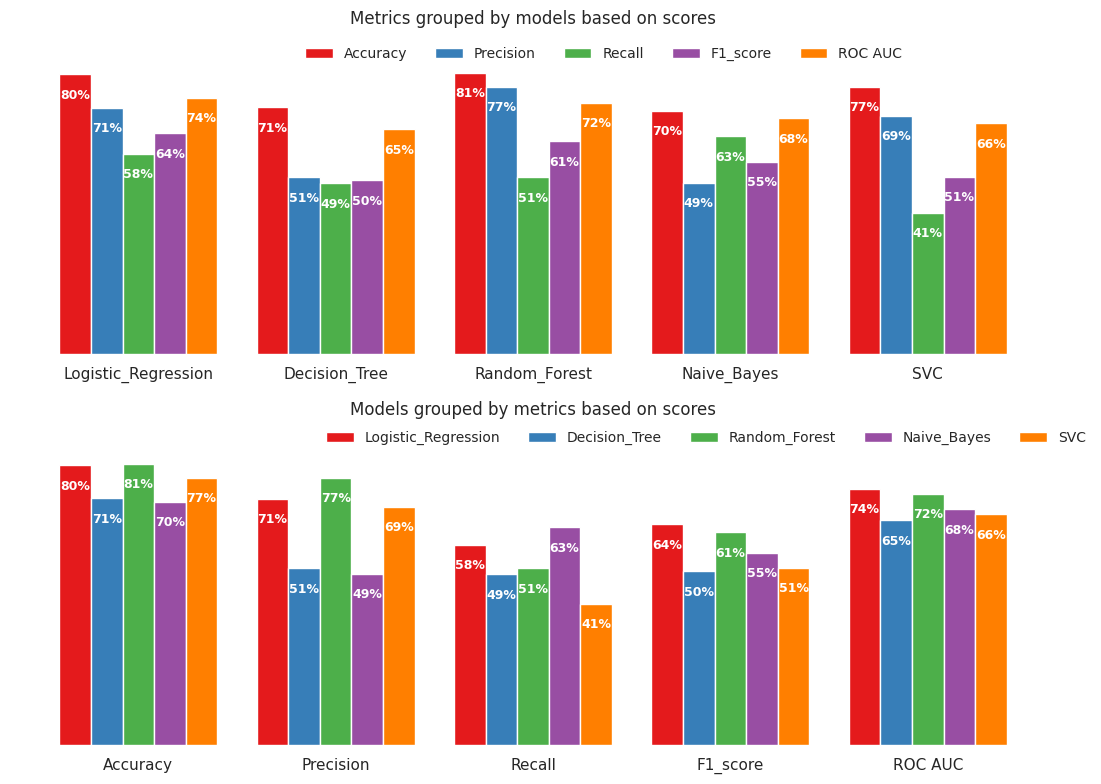

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para agregar valores al final de las barras
def add_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, -15), textcoords='offset points',fontsize=9,color='white',fontweight='bold')

# Establecer la paleta a 'viridis'
sns.set_palette('Set1')

df_graf = df_model.set_index('Metrics').copy() #elimino index y reemplazo por columna metrics

# Crear una figura y ejes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Gráfica de barras: Modelos en función de las Métricas
df_graf.T.plot(kind='bar', ax=ax[0], rot=0, width=0.8)
ax[0].set_title('Metrics grouped by models based on scores',pad=25)

# Configuraciones para la primera figura
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].grid(False)
ax[0].set_yticks([])
ax[0].legend(title='', bbox_to_anchor=(.27, .95), frameon=False, fontsize=10, ncol=len(df_graf.T.columns))

# Agregar valores a la primera gráfica
add_values(ax[0])

# Gráfica de barras: Métricas en función de los Modelos
df_graf.plot(kind='bar', ax=ax[1], rot=0, width=0.8)
ax[1].set_title('Models grouped by metrics based on scores',pad=25)

# Configuraciones para la segunda figura
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].grid(False)
ax[1].set_yticks([])
ax[1].set_xlabel('')
ax[1].legend(title='', loc='center left', bbox_to_anchor=(.29, 1.04), frameon=False, fontsize=10, ncol=len(df_graf.columns))
ax[1].set_ylabel('')

# Agregar valores a la segunda gráfica
add_values(ax[1])

plt.tight_layout()
plt.show()


##Buscando los mejores hiperparámetros

In [90]:
##Buscando los mejores hiperparámetros

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define los hiperparámetros que deseas ajustar
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Crea un modelo de regresión logística
logistic_model = LogisticRegression(random_state=42)

# Utiliza GridSearchCV para encontrar los valores óptimos para los hiperparámetros
grid_search = GridSearchCV(logistic_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Imprime los mejores hiperparámetros encontrados
print(grid_search.best_params_)


{'C': 10, 'penalty': 'l2'}


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define los hiperparámetros que deseas ajustar
param_grid = {'n_estimators': [50, 100, 200], 'max_features': ['sqrt', 'log2']}

# Crea un modelo de bosque aleatorio
forest_model = RandomForestClassifier(random_state=42)

# Utiliza GridSearchCV para encontrar los valores óptimos para los hiperparámetros
grid_search = GridSearchCV(forest_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Imprime los mejores hiperparámetros encontrados
print(grid_search.best_params_)


{'max_features': 'sqrt', 'n_estimators': 200}
